In [1]:
%matplotlib notebook

from amsre_averaged_v7 import AMSREaveraged
from quikscat_daily_v4 import QuikScatDaily

import numpy as np
import sys
import netCDF4 as nc4
import matplotlib.pyplot as plt
from pycurrents.data.timetools import ddtime, day_to_dt64, dt64_to_ymdhms

In [2]:
#read in satellite data

f = nc4.Dataset('/Users/baileydonaldson/python/plot_heat_flux/satellitedata.nc','r')
grp = f.groups['Global_data']

print(f)
print(grp)
lon = grp.variables['Longitude'][:]
lat = grp.variables['Latitude'][:]
time = grp.variables['Time'][:]
wspdA = grp.variables['Wind Speed Ascending'][:,:,:]
wspdD =grp.variables['Wind Speed Descending'][:,:,:]
sst = grp.variables['Sea Surface Temperature'][:,:,:]

f.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Unaltered Satellite Data; Region = Global; Time = 2003/01/01 - 2008/12/31;
    dimensions(sizes): 
    variables(dimensions): 
    groups: Global_data
<class 'netCDF4._netCDF4.Group'>
group /Global_data:
    dimensions(sizes): time(2192), lon(1440), lat(720)
    variables(dimensions): float32 Longitude(lon), float32 Latitude(lat), int32 Time(time), float32 Wind Speed Descending(time,lat,lon), float32 Wind Speed Ascending(time,lat,lon), float32 Sea Surface Temperature(time,lat,lon)
    groups: 


<IPython.core.display.Javascript object>


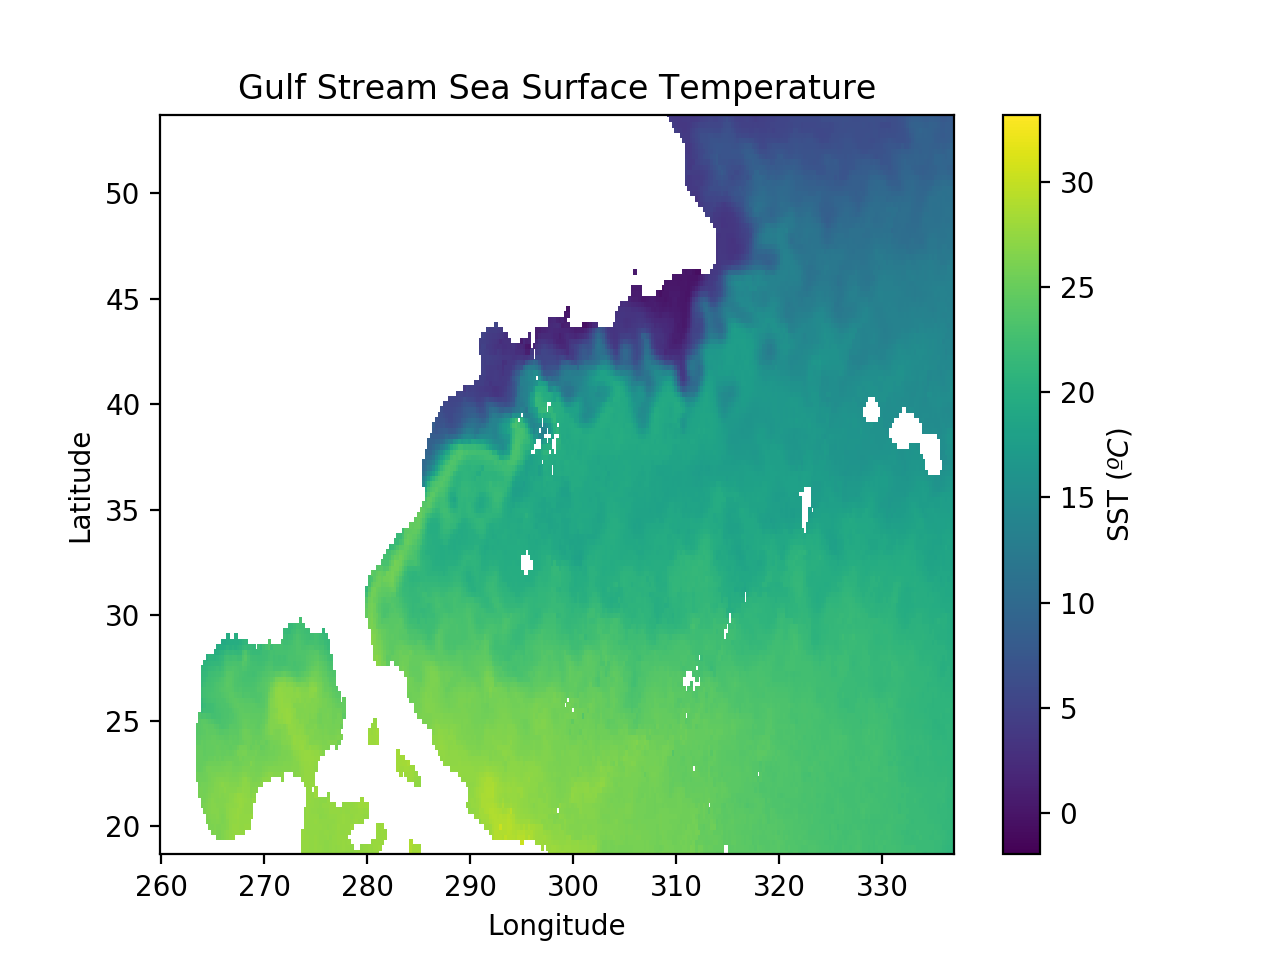

Text(0, 0.5, 'Latitude')

In [18]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(lon,lat,sst[80,:,:])
fig.colorbar(pc,ax=ax,label='SST ($ºC$)')

ax.set_title("Gulf Stream Sea Surface Temperature")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [19]:
plt.savefig('GSmap.png', dpi=300, bbox_inches='tight')


In [9]:
#
#f = nc4.Dataset('/Users/baileydonaldson/python/plot_heat_flux/KuroshioN11A.nc','r')
#grp = f.groups['Regional_data']

#print(f)
#print(grp)
#lon_testK = grp.variables['Longitude'][:]
#lat_testK = grp.variables['Latitude'][:]
#time_testK = grp.variables['Time'][:]
#wspdA_test = grp.variables['Wind Speed Ascending'][:,:,:]
#wspdD_test =grp.variables['Wind Speed Descending'][:,:,:]
#sst_test = grp.variables['Sea Surface Temperature'][:,:,:]

#f.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Region = Kuroshio; N = 11; Time = 2003/01/01 - 2008/12/31; Wind Ascending
    dimensions(sizes): 
    variables(dimensions): 
    groups: Regional_data
<class 'netCDF4._netCDF4.Group'>
group /Regional_data:
    dimensions(sizes): lon(181), lat(97), time(2192)
    variables(dimensions): float32 Longitude(lon), float32 Latitude(lat), int32 Time(time), float32 Wind Speed Ascending(time,lat,lon), float32 Wind Speed Ascending Smooth(time,lat,lon), float32 Sea Surface Temperature(time,lat,lon), float32 Sea Surface Temperature Smooth(time,lat,lon), float32 Latent Heat Flux Observational (Q)(time,lat,lon), float32 Latent Heat Flux Large Scale (Q1)(time,lat,lon), float32 Linear Term, Function of T  (Q2)(time,lat,lon), float32 Linear Term, Function of U (Q3)(time,lat,lon), float32 Clausius Clapeyron (Q4)(time,lat,lon), float32 Covariability of SST and U (Q5)(time,lat,lon), float32 Standard Devi

In [10]:
print(lat_testK)

[24.125 24.375 24.625 24.875 25.125 25.375 25.625 25.875 26.125 26.375
 26.625 26.875 27.125 27.375 27.625 27.875 28.125 28.375 28.625 28.875
 29.125 29.375 29.625 29.875 30.125 30.375 30.625 30.875 31.125 31.375
 31.625 31.875 32.125 32.375 32.625 32.875 33.125 33.375 33.625 33.875
 34.125 34.375 34.625 34.875 35.125 35.375 35.625 35.875 36.125 36.375
 36.625 36.875 37.125 37.375 37.625 37.875 38.125 38.375 38.625 38.875
 39.125 39.375 39.625 39.875 40.125 40.375 40.625 40.875 41.125 41.375
 41.625 41.875 42.125 42.375 42.625 42.875 43.125 43.375 43.625 43.875
 44.125 44.375 44.625 44.875 45.125 45.375 45.625 45.875 46.125 46.375
 46.625 46.875 47.125 47.375 47.625 47.875 48.125]


In [5]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx#, array[idx]

def data_point(lat,lon,data):
    idx_lat = find_nearest(latQ,lat)
    idx_lon = find_nearest(lonQ,lon)
    data_pt = data[idx_lat,idx_lon]
    
    #if np.isnan(data_pt == True):
    #    print("No data here")
    
    return data_pt


def data_slice(latpt,lonpt,data,lat=latA,lon=lonA):

    indi = find_nearest(latA, latpt[0])
    indf = find_nearest(latA, latpt[1])
    sl = np.arange(indi, indf)
    latsl = latA[sl]

    indi2 = find_nearest(lonA,lonpt[0])
    indf2 = find_nearest(lonA, lonpt[1])
    sl = np.arange(indi2, indf2)
    lonsl = lonA[sl]
    
    if data.ndim == 2:
        datasl = data[indi:indf, indi2:indf2]
    elif data.ndim == 3:
        datasl = data[:,indi:indf, indi2:indf2]
    
    return latsl, lonsl, datasl


NameError: name 'latA' is not defined

In [11]:
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5, cmap=custom_div_cmap(mincol='#1b7837', maxcol='#762a83'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=plt.cm.get_cmap('Blues'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=plt.cm.get_cmap('RdBu_r'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=plt.cm.get_cmap('RdBu'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=plt.cm.get_cmap('seismic'),vmin=-40, vmax=40)
#ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='0.4', linewidths=1)
#ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='white', linewidths=1)

In [12]:
def getdates(day1, day2):
    '''
    Parameters: First and Last Date in Form yyyy/mm/dd hh:mm:ss'
    
    Return: array containing decimal dates (starting 1-1-1), 
    starting from day1 to day2, spacing is 1
    '''
    
    day1 = ddtime(1,day1)
    day2 = ddtime(1,day2)
    time = np.arange(day1, day2+1)
    return time


def timearr(day1,day2): #day1 = '2009/01/01 00:00:00',day2 = '2009/01/31 00:00:00'):
    
    '''
    Parameters: First and Last Date in Form yyyy/mm/dd hh:mm:ss'
    
    Return: array containing str dates in form yyyymmdd, it includes every
    day from day1 to day2
    '''  

    tarr = getdates(day1,day2)

    t = day_to_dt64(1,tarr)
    t = dt64_to_ymdhms(t)

    ttt = ['','','']
    tttt = np.empty(len(t), dtype=int)
    
    for i in range(len(t)):
        tt = t[i] 
        #delete hh,mm, and ss column
        tt = np.delete(tt,5,0)
        tt = np.delete(tt,4,0)
        tt = np.delete(tt,3,0)

        #ensures mm and dd have two didgits (e.g. 1 is 01)
        if tt[1] < 10:
            ttt[1] = ('0' + str(tt[1]))
        else:
            ttt[1] = str(tt[1])
            
        if tt[2] < 10:
            ttt[2] = ('0' + str(tt[2]))
        else:
            ttt[2] = str(tt[2])
        
    
        ttt[0] = str(tt[0])
        tttt[i] = ''.join(ttt)
        
    tttt = list(map(str, tttt)) 
    
    return tttt



In [13]:
def monthly_avg(data, time):
    '''
    Function allows you to average data by each month.

    Paramaters: data to average and time in decimal form
    Returns: (1) data averaged by each month and (2) year and month
    '''

    t = day_to_dt64(1,time)
    ymdhms = dt64_to_ymdhms(t)
    
    ym = ymdhms[:,0:2]
    y = ymdhms[:,0]
    m = ymdhms[:,1]
    
    #get unique values of [year, month]
    ym_uniq, idx = np.unique(ym,return_index=True,axis=0)
    
    #divide data where the months changee
    idx = np.append(idx, len(ym)+1)
    mmean = [np.nanmean(data[idx[i]:idx[i+1]-1,:,:]) for i in range(len(idx)-1)]
    
    #split data based on where the month changes
    split = np.split(data, idx, axis = 0)
    
    #makes string mm/yyyy for plotting purposes
    m_str = [str(ym_uniq[i,1]) + '/' + str(ym_uniq[i,0]) for i in range(len(ym_uniq[:,0]))] 
     
    return mmean, ym, m_str



### Smoothing Data

In [14]:
def smooth(data, data2, N=17):
    '''
    Description:
    
    Paramaters: "data" will be smoothed, "data2" will NOT be smoothed but 
        it will be shortened to the same size as "data." "N" is the width
        and length of the squares over which "data" is smoothed
    '''
    
    #this ensures that N is an odd number
    N = (int(N/2)*2)+1
    
    #initialize    
    W = data.shape[0]
    L = data.shape[1]
    datasum = np.zeros((W-N+1,L-N+1)) #row, column
    counts = np.zeros((W-N+1,L-N+1))    
    ai = N-1
    af = 0
    bi = N-1
    bf = 0
    indx_row = np.arange(data.shape[0])
    indx_col = np.arange(data.shape[1])
    
    for i in range(N):
    
        delrow = np.delete(indx_row,slice(ai,W-af))
        data_delrow = np.delete(data,delrow,0)
    
        for j in range(N):       
            
            #delete excess rows and columns
            delcol = np.delete(indx_col,slice(bi,L-bf))
            data_delrowcol = np.delete(data_delrow,delcol,1)   
            
            #count number of good values
            goodind = np.where(np.isnan(data_delrowcol) == False)
            counts[goodind] = counts[goodind] + 1
            
            #change NaN to zero then add
            data_delrowcol[np.isnan(data_delrowcol) == True] = 0
            datasum = datasum + data_delrowcol     

            bi = bi-1
            bf = bf+1
        ai = ai-1
        af = af+1
        bi = N-1
        bf = 0 
    
    datasmooth = datasum/counts
    datasmooth[np.where(counts < (N**2)/2)] = None
    
    #delete points that were NaN in original data    
    a = int((N-1)/2)
    datashort = data[a:W-a, a:L-a]
    datasmooth[np.where(np.isnan(datashort) == True)] = None
    
    #makes data2 the same size as data
    data2short = data2[a:W-a, a:L-a]    
    

    
    return datasmooth, data2short


In [46]:
#lon
#lat
#wspdA

#smooth, short = smooth(wspdA[0,:,:], wspdA[0,:,:], N=11)

N=11
a = int((N-1)/2)
manually_short = wspdA[0,a:len(lat)-a,a:len(lon)-a]





(710, 1430)
[4.2 4.2 4.2 4.2 4.2 4.  4.  4.  4.6 4.6 5.  5.  5.2 4.6 4.6 5.2 5.2 5.4
 5.  5. ]
[4.2 4.2 4.2 4.2 4.2 4.  4.  4.  4.6 4.6 5.  5.  5.2 4.6 4.6 5.2 5.2 5.4
 5.  5. ]


## Latent Heat Calculation

E = rhoa* CE* |U10|* (qs-qa)

Ql = Lv*E

[Ql] = 1 W m^-2 = 1 kg s^-3

Density of air at sea level: rhoa = 1.178 kg m^-3

CE = 1.3 x 10^-3

Wind speed at 10 m: U10 

Specific humidity at the standard height (10 m): qa

Saturation humidity at the SST (which ~= air temp): qs

Latet Heat of Evaporation: Lv = 2.5 x 10^6 J kg-1

Need to find: qa and qs

qa = mv/(mv + md)

Saturation vapor pressure: e(T) = 6.1094 exp(17.625T/(T + 243.04))



Saturation vapor pressure vs saturation humidity???

In [17]:
def calculate_QL(SST,U):
    '''
    Description: calculates Latent Heat
    
    Parameters: Sea Surface Temperature and Wind Speed
    '''
    
    #guesstimated constants:
    p = 1026.8 #hPa
    Md = 28.97 #g
    Mw = 18.016 #g
    rho = 1.178
    Lv = 2500000
    Ce = .001
    
    #calculates saturation humidity (qs) from saturation vapor pressure (e)
    
    e = 6.1094*np.exp((17.625*SST)/(SST + 243.04))
    ep = e/p
    qs = (Mw*ep)/(Md - Md*ep + Mw*ep)
    qa = 0.7*qs #estimation
    
    #calculates Evaporation
    E = rho*Ce*U*(qs-qa)
    
    #calculates Latent Heat
    QL = Lv*E
    
    return QL  #W/m^2


In [28]:
print(np.nanmax(wspdA))
print(calculate_QS(30,30))

31.0


NameError: name 'calculate_QS' is not defined

In [18]:
def QL_avg(SST,U,N=17):

    
    if SST.shape != U.shape:
        print("Shape of SST and U are unequal.")
    
    #this ensures that N is an odd number
    N = (int(N/2)*2)+1
    
    #initialize
    W = SST.shape[0]
    L = SST.shape[1]
    SSTsum = np.zeros((W-N+1,L-N+1)) #row, column
    Usum = np.zeros((W-N+1,L-N+1))
    Qsum = np.zeros((W-N+1,L-N+1))
    Qcounts = np.zeros((W-N+1,L-N+1)) 
    ai = N-1
    af = 0
    bi = N-1
    bf = 0
    indx_row = np.arange(SST.shape[0])
    indx_col = np.arange(SST.shape[1])
    
    for i in range(N):
        
        #delete excess rows 
        delrow = np.delete(indx_row,slice(ai,W-af))
        SST_delrow = np.delete(SST,delrow,0)
        U_delrow = np.delete(U,delrow,0)
    
        for j in range(N):       
            
            #delete excess columns 
            delcol = np.delete(indx_col,slice(bi,L-bf))
            SST_delrowcol = np.delete(SST_delrow,delcol,1)
            U_delrowcol = np.delete(U_delrow,delcol,1)
            
            #count number of good values
            Qgoodind  = np.where((np.isnan(U_delrowcol) == False) & (np.isnan(SST_delrowcol) == False))
            Qcounts[Qgoodind] = Qcounts[Qgoodind] + 1
            
            #change NaN to zero then add
            SST_delrowcol[np.isnan(SST_delrowcol) == True] = 0
            U_delrowcol[np.isnan(U_delrowcol) == True] = 0            
            Qsum = Qsum + calculate_QL(SST_delrowcol,U_delrowcol)     
            
            bi = bi-1
            bf = bf+1

        ai = ai-1
        af = af+1
        bi = N-1
        bf = 0 

    QL_avg = Qsum/Qcounts
    QL_avg[np.where(Qcounts < (N**2)/2)] = None                         

    return QL_avg  


### Taylor Expansion of Latent Heat

In [19]:
def taylorexp_QL(SST,U,N=17,D=0.1):
    '''
    SST = sea surface temperature of your choice (must be same size as U)
    U = Wind velocity of your choice (must be same size as SST)
    N = smoothing
    D = delta
    
    '''
    
    if SST.ndim == 2 and U.ndim == 2:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        SSTsm, Ush = smooth(SST,U,N)
        Usm, SSTsh = smooth(U,SST,N)
        
    elif SST.ndim == 3 and U.ndim == 3:
        
        #get smoothed SST and U and their shortened unsmoothed counterparts
        T = SST.shape[0]
        W = SST.shape[1]
        L = SST.shape[2]
        size = [T,W-N+1,L-N+1]
        
        SSTsm = np.empty(size)
        Ush = np.empty(size)
        SSTsh = np.empty(size)
        Usm = np.empty(size) 
        
        for i in range(T):
            SSTsm[i,:,:], Ush[i,:,:] = smooth(SST[i,:,:],U[i,:,:],N)
            Usm[i,:,:], SSTsh[i,:,:] = smooth(U[i,:,:],SST[i,:,:],N)         
    else:
        print("Number of Dimensions is Unequal.")
  
    Ti = SSTsh - SSTsm
    Ui = Ush - Usm           
        
    #get latent heat 
    Q = calculate_QL(SSTsh,Ush)    

    #First Taylor Expansion term: Q(T_sm,U_sm)
    Q1 = calculate_QL(SSTsm,Usm)
    
    #Second Taylor Expansion term:
    Q_DT = (calculate_QL(SSTsm+D,Usm) - calculate_QL(SSTsm-D,Usm))/(2*D)
    Q2 = Q_DT*Ti
    
    #Third Taylor Expansion term: 
    #Q_DU = Q/Ushort
    Q_DU = (calculate_QL(SSTsm,Usm+D) - calculate_QL(SSTsm,Usm-D))/(2*D)
    Q3 = Q_DU*Ui
    
    #Fourth Taylor Expansion term: {Q_tt(T_sm,U_sm) * (T')^2} / 2!
    Q_DTT = (calculate_QL(SSTsm+D,Usm) - 2*Q1 + calculate_QL(SSTsm-D,Usm)) / (D**2)
    Q4 = (Q_DTT * (Ti)**2) / 2
    
    #Fifth Taylor Expansion term: Q_ut(T_sm,U_sm) * (T'U')^2
    Q_DTDU = (calculate_QL(SSTsm+D,Usm+D)-calculate_QL(SSTsm+D,Usm-D) - \
        calculate_QL(SSTsm-D,Usm+D)+calculate_QL(SSTsm-D,Usm-D))/(4*D*D)
    Q5 = Q_DTDU * Ti * Ui

    #Sixth Taylor Expansion term: Q_uu(T_sm,Usm)*(U')^2} / 2!
    Q_DUU = 0
    
    return Q, Q1, Q2, Q3, Q4, Q5     
    
    
    

In [20]:
def deviation_avg(SST,U,SSTsm,Usm,N=17):
    '''
    Paramaters:
    SST and U is data that has NOT been shortened 
    
    SSTsm and Usm are already smoothed data that is shorter than SST
        and U by N indicies in both rows and columns.
    
    '''
    
    
    
    #calculate Ti_avg and Ui_avg
    N = (int(N/2)*2)+1 #make N odd

    if SST.shape != U.shape:
        print('Shape of SST and U are unequal.')
    elif SSTsm.shape != Usm.shape:
        print('Shape of SSTsm and Usm are unequal.')
    elif SST.shape == SSTsm.shape:
        print('SSTsm is too large or SST is to small')
    elif U.shape == Usm.shape:
        print('Usm is too large or U is to small')
    
    #initialize    
    W = SST.shape[0]
    L = SST.shape[1] 
    SSTcounts = np.zeros((W-N+1,L-N+1))  #row, column 
    Ucounts = np.zeros((W-N+1,L-N+1)) 
    USSTcounts = np.zeros((W-N+1,L-N+1)) 
    Ti_sum = np.zeros((W-N+1,L-N+1))
    Ui_sum = np.zeros((W-N+1,L-N+1))
    Ti2_sum = np.zeros((W-N+1,L-N+1))
    UiTi_sum = np.zeros((W-N+1,L-N+1))
    T_std = np.zeros((W-N+1,L-N+1))
    #nan_idx = np.zeros((W-N+1,L-N+1))
    ai = N-1
    af = 0
    bi = N-1
    bf = 0
    indx_row = np.arange(SST.shape[0])
    indx_col = np.arange(SST.shape[1])

    for i in range(N):
        #deletes excess rows 
        delrow = np.delete(indx_row,slice(ai,W-af))
        SST_delrow = np.delete(SST,delrow,0)
        U_delrow = np.delete(U,delrow,0)
    
        for j in range(N):       
            
            #delete excess columns
            delcol = np.delete(indx_col,slice(bi,L-bf))
            SST_delrowcol = np.delete(SST_delrow,delcol,1) 
            U_delrowcol = np.delete(U_delrow,delcol,1)
            
            #count number of good values
            SSTgoodind = np.where(np.isnan(SST_delrowcol) == False)
            SSTcounts[SSTgoodind] = SSTcounts[SSTgoodind] + 1
            
            Ugoodind = np.where(np.isnan(U_delrowcol) == False)
            Ucounts[Ugoodind] = Ucounts[Ugoodind] + 1
            
            USSTgoodind  = np.where((np.isnan(U_delrowcol) == False) & (np.isnan(SST_delrowcol) == False))
            USSTcounts[USSTgoodind] = USSTcounts[USSTgoodind] + 1
            
            #save array of bad indicies 
            #bad_idx = np.where(np.isnan(U_delrowcol) == True) 
            #nan_idx[bad_idx] = 1                               
            #bad_idx = np.where(np.isnan(SST_delrowcol) == True)
            #nan_idx[bad_idx] = 1

            
            #change NaN to zeros
            SST_delrowcol[np.isnan(SST_delrowcol) == True] = 0
            U_delrowcol[np.isnan(U_delrowcol) == True] = 0
    
            #subtract averaged from mean (mean found above in smoothing)
            Ti_sum = Ti_sum + SST_delrowcol - SSTsm
            Ui_sum = Ui_sum + U_delrowcol - Usm
            Ti2_sum = Ti2_sum + (SST_delrowcol - SSTsm)**2
            UiTi_sum = UiTi_sum + (SST_delrowcol - SSTsm)*(U_delrowcol - Usm)
                        
            
            bi = bi-1
            bf = bf+1
        ai = ai-1
        af = af+1
        bi = N-1
        bf = 0 
    
    #take average
    Ti_avg = Ti_sum/SSTcounts
    Ui_avg = Ui_sum/Ucounts
    Ti2_avg = Ti2_sum/SSTcounts
    UiTi_avg = UiTi_sum/USSTcounts
    
    #standard deviation 
    T_std = np.sqrt(Ti2_avg)
    
   #nan_idx = np.where(np.isnan(UiTi_avg == False))
    
    #Necessary??? Or No???
    Ti_avg[np.where(SSTcounts < (N**2))] = None
    Ui_avg[np.where(Ucounts < (N**2))] = None
    Ti2_avg[np.where(SSTcounts < (N**2))] = None
    UiTi_avg[np.where(SSTcounts < (N**2))] = None    
    UiTi_avg[np.where(Ucounts < (N**2))] = None  
    
    return Ti_avg, Ui_avg, Ti2_avg, UiTi_avg#, T_std, nan_idx

    

In [21]:
#test deviation_avg

#latERpt = [-50,-35]
#lonERpt = [10,40]

#_, _, sstER_test = data_slice(latERpt,lonERpt,sst,latA,lonA)
#_, _, wspdAER_test = data_slice(latERpt,lonERpt,wspdA,latQ,lonQ)
#sstERsm_t, _ = smooth(sstER_test,wspdAER_test)
#wspdAERsm_t, _ = smooth(wspdAER_test,sstER_test)

#Ti_avg, Ui_avg, Ti2_avg, UiTi_avg = deviation_avg(sstER_test,wspdAER_test,sstERsm_t,wspdAERsm_t)

#print(np.nanmean(Ti_avg))

#fig, ax = plt.subplots()
#pc = ax.pcolormesh(Ti_avg)
#pc = ax.pcolormesh(Ti2_avg)
#pc = ax.pcolormesh(UiTi_avg)
#pc = ax.pcolormesh(nan_idx)
#pc = ax.pcolormesh(sstER_test)
#pc = ax.pcolormesh(sstERsm_t)
#pc = ax.pcolormesh(wspdAER_test)
#pc = ax.pcolormesh(wspdAERsm_t)
#fig.colorbar(pc,ax=ax)


In [22]:
def taylorexp_QLavg(SST,U,N=17,D=0.1):
    '''
    Takes the taylor expansion over the large scale state.
    
    SST = sea surface temperature of your choice (must be same size as U)
    U = Wind velocity of your choice (must be same size as SST)
    N = smoothing
    D = delta
    
    '''
    
    if SST.ndim == 2 and U.ndim == 2:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        SSTsm, Ush = smooth(SST,U,N)
        Usm, SSTsh = smooth(U,SST,N)

        Ti_avg, Ui_avg, Ti2_avg, UiTi_avg = deviation_avg(SST,U,SSTsm,Usm,N=N)
        std = np.sqrt(Ti2_avg)
        
        #average heat flux
        Q0 = QL_avg(SST,U,N)
        
    elif SST.ndim == 3 and U.ndim == 3:
        
        #get smoothed SST and U and their shortened unsmoothed counterparts
        T = SST.shape[0]
        W = SST.shape[1]
        L = SST.shape[2]
        size = [T,W-N+1,L-N+1]
        
        SSTsm = np.empty(size)
        Ush = np.empty(size)
        SSTsh = np.empty(size)
        Usm = np.empty(size)
        
        Q0 = np.empty(size)
        Q1 = np.empty(size)
        
        Ti_avg = np.empty(size) 
        Ui_avg = np.empty(size) 
        Ti2_avg = np.empty(size) 
        UiTi_avg = np.empty(size)      
        nan_idx = np.empty(size)
        
        std = np.empty(size)
        
        for i in range(T):
            SSTsm[i,:,:], Ush[i,:,:] = smooth(SST[i,:,:],U[i,:,:],N)
            Usm[i,:,:], SSTsh[i,:,:] = smooth(U[i,:,:],SST[i,:,:],N)         

            Ti_avg[i,:,:], Ui_avg[i,:,:], Ti2_avg[i,:,:], UiTi_avg[i,:,:] \
            = deviation_avg(SST[i,:,:],U[i,:,:],SSTsm[i,:,:],Usm[i,:,:],N=N)
            
            std[i,:,:] = np.sqrt(Ti2_avg[i,:,:])
            
            #average heat flux
            Q0[i,:,:] = QL_avg(SST[i,:,:],U[i,:,:],N)
       
    else:
        print("Number of Dimensions is Unequal.")
  

        
    #First Taylor Expansion term: Q(T_sm,U_sm) 
    Q1 = calculate_QL(SSTsm,Usm)

    #Second Taylor Expansion term: 
    Q_DT = (calculate_QL(SSTsm+D,Usm) - calculate_QL(SSTsm-D,Usm))/(2*D)
    Q2 = Q_DT*Ti_avg
    
    #Third Taylor Expansion term: 
    #Q_DU = Q/Ushort
    Q_DU = (calculate_QL(SSTsm,Usm+D) - calculate_QL(SSTsm,Usm-D))/(2*D)
    Q3 = Q_DU*Ui_avg
    
    #Fourth Taylor Expansion term: {Q_tt(T_sm,U_sm) * (T')^2} / 2!
    Q_DTT = (calculate_QL(SSTsm+D,Usm) - 2*Q1 + calculate_QL(SSTsm-D,Usm)) / (D**2) #ERROR?
    Q4 = (Q_DTT * Ti2_avg) / 2
    
    #Fifth Taylor Expansion term: Q_ut(T_sm,U_sm) * (T'U')^2
    Q_DTDU = (calculate_QL(SSTsm+D,Usm+D)-calculate_QL(SSTsm+D,Usm-D) - \
        calculate_QL(SSTsm-D,Usm+D)+calculate_QL(SSTsm-D,Usm-D))/(4*D*D)
    Q5 = Q_DTDU * UiTi_avg

    #Sixth Taylor Expansion term: Q_uu(T_sm,Usm)*(U')^2} / 2!
    Q_DUU = 0
    
    
    nan_idx = np.where(np.isnan(Q5) == True)
    Q0[nan_idx] = None
    Q1[nan_idx] = None
    Q2[nan_idx] = None
    Q3[nan_idx] = None
    Q4[nan_idx] = None
    
    return Q0, Q1, Q2, Q3, Q4, Q5, std 
    
    

In [23]:
def std(SST,U,N=17,D=0.1):
    
    '''Finds Standard of deviation and RMS'''
    
    if SST.ndim == 2 and U.ndim == 2:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        SSTsm, Ush = smooth(SST,U,N)
        Usm, SSTsh = smooth(U,SST,N)

        Ti_avg, Ui_avg, Ti2_avg, UiTi_avg = deviation_avg(SST,U,SSTsm,Usm,N=N)
        
        std = np.sqrt(Ti2_avg)
        
        
    elif SST.ndim == 3 and U.ndim == 3:
        
        #get smoothed SST and U and their shortened unsmoothed counterparts
        T = SST.shape[0]
        W = SST.shape[1]
        L = SST.shape[2]
        size = [T,W-N+1,L-N+1]
        
        SSTsm = np.empty(size)
        Ush = np.empty(size)
        SSTsh = np.empty(size)
        Usm = np.empty(size)
        
        Ti_avg = np.empty(size) 
        Ui_avg = np.empty(size) 
        Ti2_avg = np.empty(size) 
        UiTi_avg = np.empty(size) 
        
        std = np.empty(size)
        
        for i in range(T):
            SSTsm[i,:,:], Ush[i,:,:] = smooth(SST[i,:,:],U[i,:,:],N)
            Usm[i,:,:], SSTsh[i,:,:] = smooth(U[i,:,:],SST[i,:,:],N)         

            Ti_avg[i,:,:], Ui_avg[i,:,:], Ti2_avg[i,:,:], UiTi_avg[i,:,:] \
            = deviation_avg(SST[i,:,:],U[i,:,:],SSTsm[i,:,:],Usm[i,:,:],N=N)
         
            std[i,:,:] = np.sqrt(Ti2_avg[i,:,:])
        
    else:
        print("Number of Dimensions is Unequal.")
  
    
    return std
    

In [24]:
def taylorexp_QLavg_std(SST,U,N=17,D=0.1):
    '''
    Takes the taylor expansion over the large scale state.
    
    SST = sea surface temperature of your choice (must be same size as U)
    U = Wind velocity of your choice (must be same size as SST)
    N = smoothing
    D = delta
    
    '''
    
    if SST.ndim == 2 and U.ndim == 2:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        SSTsm, Ush = smooth(SST,U,N)
        Usm, SSTsh = smooth(U,SST,N)
        
        
        
        Ti_avg, Ui_avg, Ti2_avg, UiTi_avg = deviation_avg(SST,U,SSTsm,Usm,N=N)
        std = np.sqrt(Ti2_avg)
        #average heat flux
        Q0 = QL_avg(SST,U,N)
        
    elif SST.ndim == 3 and U.ndim == 3:
        
        #get smoothed SST and U and their shortened unsmoothed counterparts
        T = SST.shape[0]
        W = SST.shape[1]
        L = SST.shape[2]
        size = [T,W-N+1,L-N+1]
        
        SSTsm = np.empty(size)
        Ush = np.empty(size)
        SSTsh = np.empty(size)
        Usm = np.empty(size)
        
        Q0 = np.empty(size)
        Q1 = np.empty(size)
        
        Ti_avg = np.empty(size) 
        Ui_avg = np.empty(size) 
        Ti2_avg = np.empty(size) 
        UiTi_avg = np.empty(size)      
        nan_idx = np.empty(size)
        
        std = np.empty(size)
        
        for i in range(T):
            SSTsm[i,:,:], Ush[i,:,:] = smooth(SST[i,:,:],U[i,:,:],N)
            Usm[i,:,:], SSTsh[i,:,:] = smooth(U[i,:,:],SST[i,:,:],N)         

            Ti_avg[i,:,:], Ui_avg[i,:,:], Ti2_avg[i,:,:], UiTi_avg[i,:,:] \
            = deviation_avg(SST[i,:,:],U[i,:,:],SSTsm[i,:,:],Usm[i,:,:],N=N)
            
            std[i,:,:] = np.sqrt(Ti2_avg[i,:,:])
            
            #average heat flux
            Q0[i,:,:] = QL_avg(SST[i,:,:],U[i,:,:],N)
       
    else:
        print("Number of Dimensions is Unequal.")
  

        
    #First Taylor Expansion term: Q(T_sm,U_sm) 
    Q1 = calculate_QL(SSTsm,Usm)

    #Second Taylor Expansion term: 
    Q_DT = (calculate_QL(SSTsm+D,Usm) - calculate_QL(SSTsm-D,Usm))/(2*D)
    Q2 = Q_DT*Ti_avg
    
    #Third Taylor Expansion term: 
    #Q_DU = Q/Ushort
    Q_DU = (calculate_QL(SSTsm,Usm+D) - calculate_QL(SSTsm,Usm-D))/(2*D)
    Q3 = Q_DU*Ui_avg
    
    #Fourth Taylor Expansion term: {Q_tt(T_sm,U_sm) * (T')^2} / 2!
    Q_DTT = (calculate_QL(SSTsm+D,Usm) - 2*Q1 + calculate_QL(SSTsm-D,Usm)) / (D**2)
    Q4 = (Q_DTT * Ti2_avg) / 2
    
    #Fifth Taylor Expansion term: Q_ut(T_sm,U_sm) * (T'U')^2
    Q_DTDU = (calculate_QL(SSTsm+D,Usm+D)-calculate_QL(SSTsm+D,Usm-D) - \
        calculate_QL(SSTsm-D,Usm+D)+calculate_QL(SSTsm-D,Usm-D))/(4*D*D)
    Q5 = Q_DTDU * UiTi_avg

    #Sixth Taylor Expansion term: Q_uu(T_sm,Usm)*(U')^2} / 2!
    Q_DUU = 0
    
    
    nan_idx = np.where(np.isnan(Q5) == True)
    Q0[nan_idx] = None
    Q1[nan_idx] = None
    Q2[nan_idx] = None
    Q3[nan_idx] = None
    Q4[nan_idx] = None
    
    return Q0, Q1, Q2, Q3, Q4, Q5, std
    
    

# Running Functions

### Read in Data

In [22]:
time, lat, lon, wspdA, wspdD, sst = read_dataq_t('2003/01/01 00:00:00','2008/12/31 00:00:00')



20031030  is missing.
20031031  is missing.
20031101  is missing.
20031102  is missing.
20031103  is missing.
20031104  is missing.
20031105  is missing.
20041119  is missing.
20060716  is missing.
20061118  is missing.
20071128  is missing.
20081126  is missing.
20081127  is missing.


In [119]:
N=11*0.25*0.5

#Agulhas (S to S and E to E)
latERpt = [-51.125-(N-0.25),-32.125+(N+0.25)]
lonERpt = [5.125-(N-0.25),80.125+(N+0.25)]
latER,lonER,wspdAER = data_slice(latERpt,lonERpt,wspdA)
_,_,sstER = data_slice(latERpt,lonERpt,sst)


#Gulf Stream (36.25 N to 47.875 N and 289.125 W to 323.875 W)
latWBCpt = [36.125-(N-0.25),47.875+(N+0.25)]
lonWBCpt = [289.125-(N-0.25),323.875+(N+0.25)]
latWBC,lonWBC,wspdAWBC = data_slice(latWBCpt,lonWBCpt,wspdA)
_,_,sstWBC = data_slice(latWBCpt,lonWBCpt,sst)


#Kuroshio (120 E to 180 E and 26 to 48 N)
latKpt = [24.125-(N-0.25),48.125+(N+0.25)]
lonKpt = [135.125-(N-0.25),180.125+(N+0.25)]
latK,lonK,wspdAK = data_slice(latKpt,lonKpt,wspdA)
_,_,sstK = data_slice(latKpt,lonKpt,sst)

In [26]:
mmean_sst, ym, m_str = monthly_avg(sstK, time)

<IPython.core.display.Javascript object>


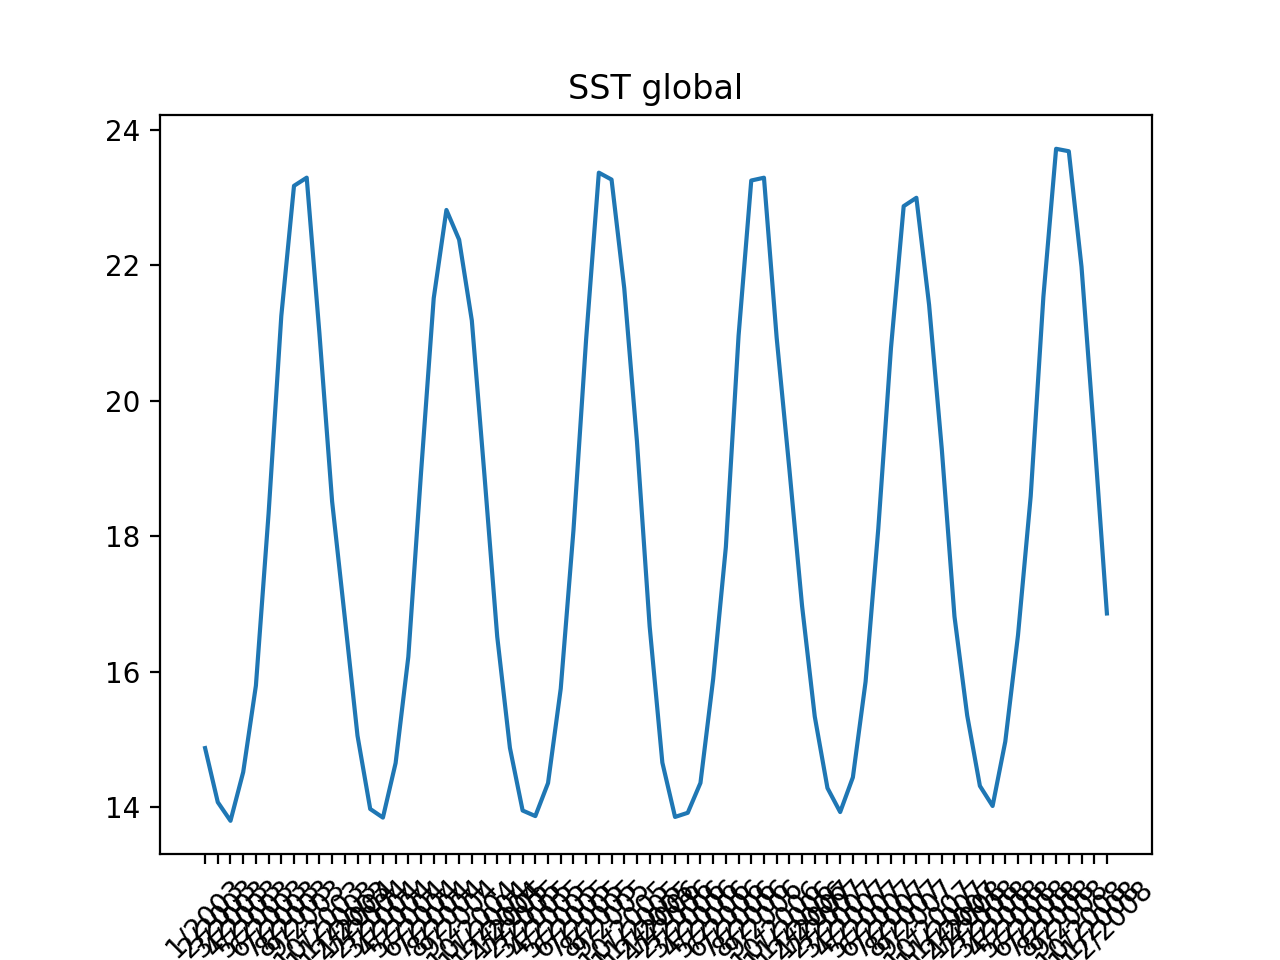

Text(0.5, 1.0, 'SST global')

In [27]:
fig, ax = plt.subplots()
pc = ax.plot(m_str,mmean_sst)
plt.xticks(rotation = 45)
ax.set_title('SST global')

### Standard Deviation

In [ ]:

s=sstER[0:10,:,:]
w=wspdAER[0:10,:,:]
print(sstER.shape)
stdER = std(sstER,wspdAER,N=17,D=0.1)
stdWBC = std(sstWBC,wspdAWBC,N=17,D=0.1)

In [ ]:

a = 8
lonAg = lonA[a:len(lonA)-a]
latAg = latA[a:len(latA)-a]

array = np.asarray(stdER)
print(array.shape)


fig, ax = plt.subplots()
#pc = ax.pcolormesh(lonAg,latAg,t_std)
pc = ax.pcolormesh(stdWBC[19,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('T std')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



<IPython.core.display.Javascript object>


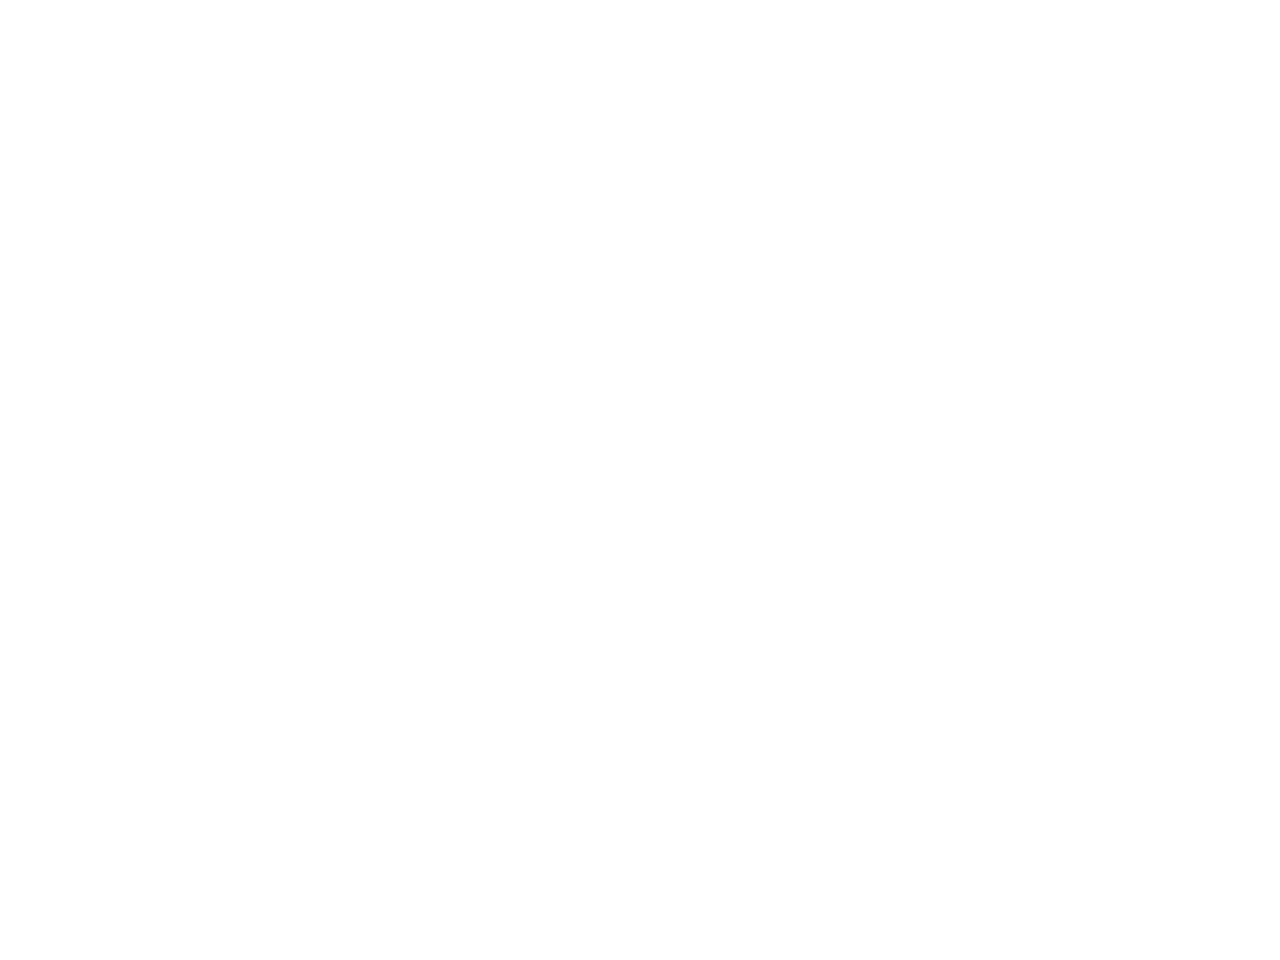

NameError: name 'time' is not defined

In [10]:

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
ax.plot(time,np.nanmax(stdER, axis = (1,2)), 'g')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('STD Deviation of SST in Agulhas Confluence Region')
ax.set_ylabel('STD of SST (ºC)')
ax.set_xlabel('Time')

ax = axs[1]
ax.plot(time,np.nanmax(stdWBC, axis = (1,2)), 'g')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('STD Deviation of SST in Gulf Stream')
ax.set_ylabel('STD of SST (ºC)')
ax.set_xlabel('Time')

### Run Latent Heat Calculations

In [120]:
#global
#Q, Q1, Q2, Q3, Q4, Q5 = taylorexp_QLavg(sst,wspdA,17,0.1)

#Eddy Rich Region
Q_ER, Q1_ER, Q2_ER, Q3_ER, Q4_ER, Q5_ER, stdER = taylorexp_QLavg(sstER,wspdAER,N=11,D=0.1)

/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


In [121]:
#Western Boundary Current Region - GULF STREAM
Q_WBC, Q1_WBC, Q2_WBC, Q3_WBC, Q4_WBC, Q5_WBC, stdWBC = taylorexp_QLavg(sstWBC,wspdAWBC,N=11,D=0.1)


/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


In [82]:
print(Q_WBC.shape)

(2192, 48, 140)


In [122]:
#Kuroshio
Q_K, Q1_K, Q2_K, Q3_K, Q4_K, Q5_K, stdK = taylorexp_QLavg(sstK,wspdAK,N=11,D=0.1)


/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


In [123]:
a = int((len(latK) - Q_K.shape[1])/2)
lat2 = latA[a:len(latA)-a]
lon2 = lonA[a:len(lonA)-a]

#a = int((len(latWBC) - Q_WBC.shape[1])/2)
latER2 = latER[a:len(latER)-a]
lonER2 = lonER[a:len(lonER)-a]

#a = int((len(latWBC) - Q_WBC.shape[1])/2)
latWBC2 = latWBC[a:len(latWBC)-a]
lonWBC2 = lonWBC[a:len(lonWBC)-a]

latK2 = latK[a:len(latK)-a]
lonK2 = lonK[a:len(lonK)-a]


In [124]:
print(Q_ER.shape)

(2192, 77, 301)


In [125]:

size = [2192,77,301]
wspdAERsm = np.empty(size)
wspdAERsh = np.empty(size)
sstERsm = np.empty(size)
sstERsh = np.empty(size)


for i in range(len(time)):
    wspdAERsm[i,:,:], wspdAERsh[i,:,:] = smooth(wspdAER[i,:,:], wspdAER[i,:,:], N=11)
    sstERsm[i,:,:],sstERsh[i,:,:] = smooth(sstER[i,:,:], sstER[i,:,:], N=11)
    


/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


In [126]:
#smoothing
#smooth(data, data2, N=17):
#return datasmooth, data2short

size = [2192,48,140]
wspdAWBCsm = np.empty(size)
wspdAWBCsh = np.empty(size)
sstWBCsm = np.empty(size)
sstWBCsh = np.empty(size)


for i in range(len(time)):
    wspdAWBCsm[i,:,:], wspdAWBCsh[i,:,:] = smooth(wspdAWBC[i,:,:], wspdAWBC[i,:,:], N=11)
    sstWBCsm[i,:,:],sstWBCsh[i,:,:] = smooth(sstWBC[i,:,:], sstWBC[i,:,:], N=11)
    



/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


In [127]:
#smoothing
#smooth(data, data2, N=17):
#return datasmooth, data2short

size = [2192,97,181]
wspdAKsm = np.empty(size)
wspdAKsh = np.empty(size)
sstKsm = np.empty(size)
sstKsh = np.empty(size)


for i in range(len(time)):
    wspdAKsm[i,:,:], wspdAKsh[i,:,:] = smooth(wspdAK[i,:,:], wspdAK[i,:,:], N=11)
    sstKsm[i,:,:],sstKsh[i,:,:] = smooth(sstK[i,:,:], sstK[i,:,:], N=11)
    



/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide


In [106]:
def seasonal_avg2(data,ym,dimension=None):
    '''
    Takes seasonal average for each year. Does not combine the years together.
    Winter season includes december from the previous year. 
    Ex: DJF could be 12/2002, 1/2003, and 2/2003
    
    ym = [year, month] [year, month] ... shaped arrays that are the same 
    length as the first indice of the data array. Can obtain in monthly_avg function.
    
    '''
    
    #create indexing that isolates years from December of previous year to November
    #finds the index of where the year changes and creates array of the years
    y,idx = np.unique(ym[:,0],return_index=True,axis=0)
    #add on the last index to idx for ease when indexing in loop
    idx = np.append(idx,len(ym[:,0])-1)
    #subtract by 31 to include December from the previous year
    idx = idx-31
    #turn first index into 0 so it doesnt pull december from a different year
    idx[0]=0
    
    #get number of years for appending purposes in loop
    ylen = y[-1]-y[0]+1
    ylen = np.int(ylen)

    
    #initialize
    size = [ylen,data.shape[1],data.shape[2]]
    DJF_avg2D = np.empty(size)
    MAM_avg2D = np.empty(size)
    JJA_avg2D = np.empty(size)
    SON_avg2D = np.empty(size)
    
    DJF_avg = np.empty(ylen)
    MAM_avg = np.empty(ylen)
    JJA_avg = np.empty(ylen)
    SON_avg = np.empty(ylen)    
    
    for i in range(ylen):
        #isolates time array and data by each year
        ymtemp = ym[idx[i]:idx[i+1],1]
        datatemp = data[idx[i]:idx[i+1],:,:]
        
        #isolates data by seasons, still in 3D arrays
        data_DJF = datatemp[(ymtemp == 12) | (ymtemp == 1) | (ymtemp == 2),:,:]
        data_MAM = datatemp[(ymtemp == 3) | (ymtemp == 4) | (ymtemp == 5),:,:]
        data_JJA = datatemp[(ymtemp == 6) | (ymtemp == 7) | (ymtemp == 8),:,:]
        data_SON = datatemp[(ymtemp == 9) | (ymtemp == 10) | (ymtemp == 11),:,:]
        
        if dimension == "2D":
            
            DJF_avg2D[i,:,:] = np.nanmean(data_DJF,axis=0)
            MAM_avg2D[i,:,:] = np.nanmean(data_MAM,axis=0)
            JJA_avg2D[i,:,:] = np.nanmean(data_JJA,axis=0)
            SON_avg2D[i,:,:] = np.nanmean(data_SON,axis=0)
            
        elif dimension == "1D":
            DJF_avg[i] = np.nanmean(data_DJF)
            MAM_avg[i] = np.nanmean(data_MAM)
            JJA_avg[i] = np.nanmean(data_JJA)
            SON_avg[i] = np.nanmean(data_SON)
         
        else:
            print("Select a dimension to average over. Choose either '1D' or '2D'")
        
    print("December of", y[0]-1,"is not included in DJF for",y[0])
    
    if dimension == "2D":
        return DJF_avg2D, MAM_avg2D, JJA_avg2D, SON_avg2D, y
    elif dimension == "1D":
        return DJF_avg, MAM_avg, JJA_avg, SON_avg, y


In [107]:
def monthly_avg(data, time):
    '''
    Function allows you to average data by each month.

    Paramaters: data to average and time in decimal form
    Returns: (1) data averaged by each month and (2) year and month
    '''

    t = day_to_dt64(1,time)
    ymdhms = dt64_to_ymdhms(t)
    
    ym = ymdhms[:,0:2]
    y = ymdhms[:,0]
    m = ymdhms[:,1]
    
    #get unique values of [year, month]
    ym_uniq, idx = np.unique(ym,return_index=True,axis=0)
    
    #divide data where the months changee
    idx = np.append(idx, len(ym)+1)
    mmean = [np.nanmean(data[idx[i]:idx[i+1]-1,:,:]) for i in range(len(idx)-1)]
    
    #split data based on where the month changes
    split = np.split(data, idx, axis = 0)
    
    #makes string mm/yyyy for plotting purposes
    m_str = [str(ym_uniq[i,1]) + '/' + str(ym_uniq[i,0]) for i in range(len(ym_uniq[:,0]))] 
     
    return mmean, ym, m_str

In [116]:
_, ym ,m_str = monthly_avg(Q_K, time)
Q4_D, Q4_M, Q4_J, Q4_S, y = seasonal_avg2(Q4_K,ym,dimension='1D')

December of 2002 is not included in DJF for 2003


In [117]:
Q4_M

array([0.41394828, 0.41150342, 0.41778747, 0.40751195, 0.39240883,
       0.39070303])

<IPython.core.display.Javascript object>


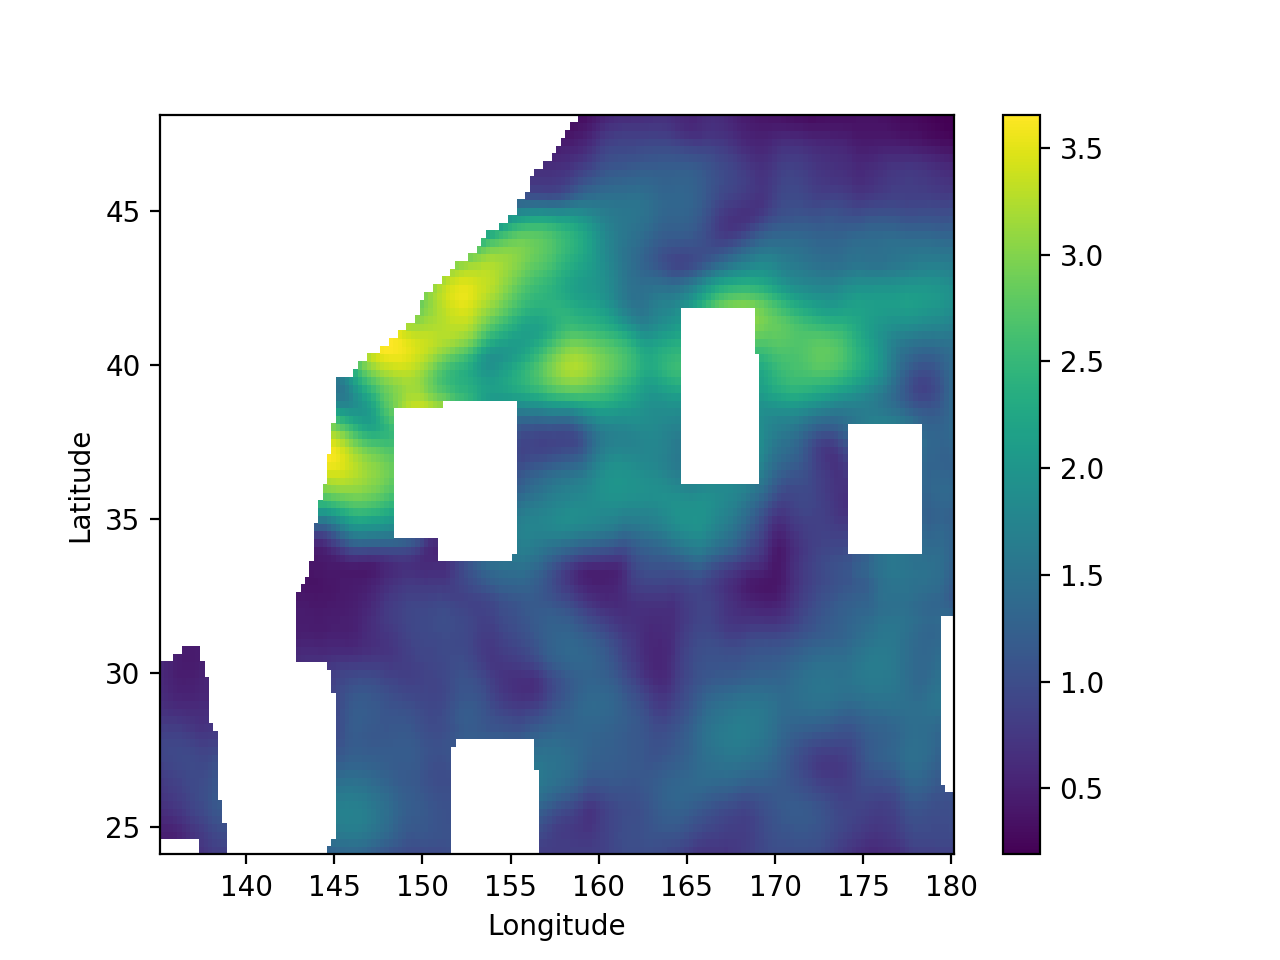

[3.53685491 3.58690635 3.62685882 ... 4.36423137 4.49500321 4.54554252]


/Users/baileydonaldson/Python/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':


In [109]:
fig, ax = plt.subplots()
#pc = ax.pcolormesh(lonAg,latAg,t_std)
pc = ax.pcolormesh(lonK2,latK2,stdK[3,:,:])
#pc = ax.pcolormesh(lonK2,latK2,stdK[3,:,:])
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

print(np.nanmax(stdK, axis = (1,2)))

## Save Data

In [128]:

#write netCDF
#use the shortened version of lat, lon, and sst, wspd

f = nc4.Dataset('/Users/baileydonaldson/python/heat_flux/AgulhasN11A.nc','w', format='NETCDF4',clobber=False)
ds = f.createGroup('Regional_data')

ds.createDimension('lon', len(lonER2))
ds.createDimension('lat', len(latER2))
ds.createDimension('time', len(time))

longitude = ds.createVariable('Longitude', 'f4', 'lon')
latitude = ds.createVariable('Latitude', 'f4', 'lat')  
t = ds.createVariable('Time', 'i4', 'time')

#windD = ds.createVariable('Wind Speed Descending','f4',('time','lat','lon'))
#windD_smooth = ds.createVariable('Wind Speed Descending Smooth','f4',('time','lat','lon'))
windA = ds.createVariable('Wind Speed Ascending','f4',('time','lat','lon'))
windA_smooth = ds.createVariable('Wind Speed Ascending Smooth','f4',('time','lat','lon'))
sst_sh= ds.createVariable('Sea Surface Temperature','f4',('time','lat','lon'))
sst_smooth = ds.createVariable('Sea Surface Temperature Smooth','f4',('time','lat','lon'))

Q = ds.createVariable('Latent Heat Flux Observational (Q)','f4',('time','lat','lon'))
Q1 = ds.createVariable('Latent Heat Flux Large Scale (Q1)','f4',('time','lat','lon'))
Q2 = ds.createVariable('Linear Term, Function of T  (Q2)','f4',('time','lat','lon'))
Q3 = ds.createVariable('Linear Term, Function of U (Q3)','f4',('time','lat','lon'))
Q4 = ds.createVariable('Clausius Clapeyron (Q4)','f4',('time','lat','lon'))
Q5 = ds.createVariable('Covariability of SST and U (Q5)','f4',('time','lat','lon'))
sst_std = ds.createVariable('Standard Deviation of Sea Surface Temperature','f4',('time','lat','lon'))


longitude[:] = lonER2
latitude[:] = latER2
t[:] = time

#windD[:,:,:] = 
#windD_smooth[:,:,:] = 
windA[:,:,:] = wspdAERsh
windA_smooth[:,:,:] = wspdAERsm
sst_sh[:,:,:] = sstERsh
sst_smooth[:,:,:] = sstERsm

Q[:,:,:] = Q_ER
Q1[:,:,:] = Q1_ER
Q2[:,:,:] = Q2_ER
Q3[:,:,:] = Q3_ER
Q4[:,:,:] = Q4_ER
Q5[:,:,:] = Q5_ER
sst_std[:,:,:] = stdER


#Add global attributes
f.description = "Region = Agulhas; N = 11; Time = 2003/01/01 - 2008/12/31; Wind Ascending"


#Add local attributes to variable instances
longitude.units = 'degrees east'
latitude.units = 'degrees north'
t.units = 'days since Jan 01, 0001'

#windD.units = 'm/s'
#windD_smooth.units = 'm/s'
windA.units = 'm/s'
windA_smooth.units = 'm/s'
sst_sh.units = 'ºC'
sst_smooth.units = 'ºC'

Q.units = 'W/m^2'
Q1.units = 'W/m^2'
Q2.units = 'W/m^2'
Q3.units = 'W/m^2'
Q4.units = 'W/m^2'
Q5.units = 'W/m^2'
sst_std.units = 'ºC'


f.close()

#reference: https://pyhogs.github.io/intro_netcdf4.html
#reference: https://towardsdatascience.com/create-netcdf-files-with-python-1d86829127dd


In [129]:
#GS

#write netCDF
#use the shortened version of lat, lon, and sst, wspd

f = nc4.Dataset('/Users/baileydonaldson/python/heat_flux/GulfStreamN11A.nc','w', format='NETCDF4',clobber=False)
ds = f.createGroup('Regional_data')

ds.createDimension('lon', len(lonWBC2))
ds.createDimension('lat', len(latWBC2))
ds.createDimension('time', len(time))

longitude = ds.createVariable('Longitude', 'f4', 'lon')
latitude = ds.createVariable('Latitude', 'f4', 'lat')  
t = ds.createVariable('Time', 'i4', 'time')

#windD = ds.createVariable('Wind Speed Descending','f4',('time','lat','lon'))
#windD_smooth = ds.createVariable('Wind Speed Descending Smooth','f4',('time','lat','lon'))
windA = ds.createVariable('Wind Speed Ascending','f4',('time','lat','lon'))
windA_smooth = ds.createVariable('Wind Speed Ascending Smooth','f4',('time','lat','lon'))
sst_sh= ds.createVariable('Sea Surface Temperature','f4',('time','lat','lon'))
sst_smooth = ds.createVariable('Sea Surface Temperature Smooth','f4',('time','lat','lon'))

Q = ds.createVariable('Latent Heat Flux Observational (Q)','f4',('time','lat','lon'))
Q1 = ds.createVariable('Latent Heat Flux Large Scale (Q1)','f4',('time','lat','lon'))
Q2 = ds.createVariable('Linear Term, Function of T  (Q2)','f4',('time','lat','lon'))
Q3 = ds.createVariable('Linear Term, Function of U (Q3)','f4',('time','lat','lon'))
Q4 = ds.createVariable('Clausius Clapeyron (Q4)','f4',('time','lat','lon'))
Q5 = ds.createVariable('Covariability of SST and U (Q5)','f4',('time','lat','lon'))
sst_std = ds.createVariable('Standard Deviation of Sea Surface Temperature','f4',('time','lat','lon'))


longitude[:] = lonWBC2
latitude[:] = latWBC2
t[:] = time

#windD[:,:,:] = 
#windD_smooth[:,:,:] = 
windA[:,:,:] = wspdAWBCsh
windA_smooth[:,:,:] = wspdAWBCsm
sst_sh[:,:,:] = sstWBCsh
sst_smooth[:,:,:] = sstWBCsm

Q[:,:,:] = Q_WBC
Q1[:,:,:] = Q1_WBC
Q2[:,:,:] = Q2_WBC
Q3[:,:,:] = Q3_WBC
Q4[:,:,:] = Q4_WBC
Q5[:,:,:] = Q5_WBC
sst_std[:,:,:] = stdWBC


#Add global attributes
f.description = "Region = Gulf Stream; N = 11; Time = 2003/01/01 - 2008/12/31; Wind Ascending"


#Add local attributes to variable instances
longitude.units = 'degrees east'
latitude.units = 'degrees north'
t.units = 'days since Jan 01, 0001'

#windD.units = 'm/s'
#windD_smooth.units = 'm/s'
windA.units = 'm/s'
windA_smooth.units = 'm/s'
sst_sh.units = 'ºC'
sst_smooth.units = 'ºC'

Q.units = 'W/m^2'
Q1.units = 'W/m^2'
Q2.units = 'W/m^2'
Q3.units = 'W/m^2'
Q4.units = 'W/m^2'
Q5.units = 'W/m^2'
sst_std.units = 'ºC'


f.close()

In [130]:
#Kuroshio

#write netCDF
#use the shortened version of lat, lon, and sst, wspd

f = nc4.Dataset('/Users/baileydonaldson/python/heat_flux/KuroshioN11A.nc','w', format='NETCDF4', clobber=False)
ds = f.createGroup('Regional_data')

ds.createDimension('lon', len(lonK2))
ds.createDimension('lat', len(latK2))
ds.createDimension('time', len(time))

longitude = ds.createVariable('Longitude', 'f4', 'lon')
latitude = ds.createVariable('Latitude', 'f4', 'lat')  
t = ds.createVariable('Time', 'i4', 'time')

#windD = ds.createVariable('Wind Speed Descending','f4',('time','lat','lon'))
#windD_smooth = ds.createVariable('Wind Speed Descending Smooth','f4',('time','lat','lon'))
windA = ds.createVariable('Wind Speed Ascending','f4',('time','lat','lon'))
windA_smooth = ds.createVariable('Wind Speed Ascending Smooth','f4',('time','lat','lon'))
sst_sh= ds.createVariable('Sea Surface Temperature','f4',('time','lat','lon'))
sst_smooth = ds.createVariable('Sea Surface Temperature Smooth','f4',('time','lat','lon'))

Q = ds.createVariable('Latent Heat Flux Observational (Q)','f4',('time','lat','lon'))
Q1 = ds.createVariable('Latent Heat Flux Large Scale (Q1)','f4',('time','lat','lon'))
Q2 = ds.createVariable('Linear Term, Function of T  (Q2)','f4',('time','lat','lon'))
Q3 = ds.createVariable('Linear Term, Function of U (Q3)','f4',('time','lat','lon'))
Q4 = ds.createVariable('Clausius Clapeyron (Q4)','f4',('time','lat','lon'))
Q5 = ds.createVariable('Covariability of SST and U (Q5)','f4',('time','lat','lon'))
sst_std = ds.createVariable('Standard Deviation of Sea Surface Temperature','f4',('time','lat','lon'))


longitude[:] = lonK2
latitude[:] = latK2
t[:] = time

#windD[:,:,:] = 
#windD_smooth[:,:,:] = 
windA[:,:,:] = wspdAKsh
windA_smooth[:,:,:] = wspdAKsm
sst_sh[:,:,:] = sstKsh
sst_smooth[:,:,:] = sstKsm

Q[:,:,:] = Q_K
Q1[:,:,:] = Q1_K
Q2[:,:,:] = Q2_K
Q3[:,:,:] = Q3_K
Q4[:,:,:] = Q4_K
Q5[:,:,:] = Q5_K
sst_std[:,:,:] = stdK


#Add global attributes
f.description = "Region = Kuroshio; N = 11; Time = 2003/01/01 - 2008/12/31; Wind Ascending"


#Add local attributes to variable instances
longitude.units = 'degrees east'
latitude.units = 'degrees north'
t.units = 'days since Jan 01, 0001'

#windD.units = 'm/s'
#windD_smooth.units = 'm/s'
windA.units = 'm/s'
windA_smooth.units = 'm/s'
sst_sh.units = 'ºC'
sst_smooth.units = 'ºC'

Q.units = 'W/m^2'
Q1.units = 'W/m^2'
Q2.units = 'W/m^2'
Q3.units = 'W/m^2'
Q4.units = 'W/m^2'
Q5.units = 'W/m^2'
sst_std.units = 'ºC'


f.close()

## Read Data

In [ ]:
f = nc4.Dataset('/Users/baileydonaldson/python/sample.nc','r')
tempgrp = f.groups['Temp_data']

print(f)
print(tempgrp)
print(tempgrp.variables['Wind Speed Descending'])
tempgrp.variables.keys()
ttime = tempgrp.variables['Time']
print(ttime.ncattrs())
#print(ttime.getncattrs('units'))

tt = tempgrp.variables['Time'][:]


In [ ]:
print(tt)

In [ ]:
f = nc4.Dataset('/Users/baileydonaldson/python/heat_flux/GulfStreamN17A.nc','r')
grp = f.groups['Regional_data']

print(f)
print(grp)
lon = grp.variables['Longitude'][:]
lat = grp.variables['Latitude'][:]
time = grp.variables['Time'][:]
wspdA = grp.variables['Wind Speed Ascending'][:,:,:]
sst = grp.variables['Sea Surface Temperature'][:,:,:]
wspdAsm =grp.variables['Wind Speed Ascending Smooth'][:,:,:]
sstsm = grp.variables['Sea Surface Temperature Smooth'][:,:,:]
Q = grp.variables['Latent Heat Flux Observational (Q)'][:,:,:]
Q1 = grp.variables['Latent Heat Flux Large Scale (Q1)'][:,:,:]
Q2 = grp.variables['Linear Term, Function of T  (Q2)'][:,:,:]
Q3=grp.variables['Linear Term, Function of U (Q3)'][:,:,:]
Q4=grp.variables['Clausius Clapeyron (Q4)'][:,:,:]
Q5=grp.variables['Covariability of SST and U (Q5)'][:,:,:]

f.close()

### Plot WBC

In [ ]:
wspdAmean_ER = np.nanmean(wspdAER,axis=(1,2))
wspdAmean_WBC = np.nanmean(wspdAWBC,axis=(1,2))
sstmean_ER = np.nanmean(sstER,axis=(1,2))
sstmean_WBC = np.nanmean(sstWBC,axis=(1,2))

fig, axs = plt.subplots()
fig.subplots_adjust(hspace=.6)

axs.plot(time,wspdAmean_WBC,label='Wspd ASC')
axs.plot(time,sstmean_WBC,label='SST')
axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('(ºC),(m/s)')
axs.set_title('Temp, Wind Speed ASC')
axs.set_xlabel('Date')




In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)

day = 1
print(lonWBC2.shape)
print(latWBC2.shape)
print(Q_WBC.shape)
ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q_WBC[day,:,:]-Q1_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Avg - Smooth')
ax.set_ylabel('Latitude')

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q1_WBC[day,:,:]+Q3_WBC[day,:,:]+Q4_WBC[day,:,:]+Q5_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Linear + Nonlinear')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q1_WBC[day,:,:]+Q2_WBC[day,:,:]+Q3_WBC[day,:,:]+Q4_WBC[day,:,:]+Q5_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Linear + Nonlinear + Smooth')

print('Qavg:',np.nanmean(Q_WBC))
print('Q1:',np.nanmean(Q1_WBC))
print('Q2:',np.nanmean(Q2_WBC))
print('Q3:',np.nanmean(Q3_WBC))
print('Q4:',np.nanmean(Q4_WBC))
print('Q5:',np.nanmean(Q5_WBC))



In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.6,wspace=.5)

day = 0

ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q2_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q2')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q3_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q3')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q4')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_WBC[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q5')

print('Qavg:',np.nanmean(Q_WBC))
print('Q1:',np.nanmean(Q1_WBC))
print('Q2:',np.nanmean(Q2_WBC))
print('Q3:',np.nanmean(Q3_WBC))
print('Q4:',np.nanmean(Q4_WBC))
print('Q5:',np.nanmean(Q5_WBC))

In [ ]:
Qmean_WBC = np.nanmean(Q_WBC, axis=(1,2))
Q1mean_WBC = np.nanmean(Q1_WBC, axis=(1,2))
Q2mean_WBC = np.nanmean(Q2_WBC, axis=(1,2))
Q3mean_WBC = np.nanmean(Q3_WBC, axis=(1,2))
Q4mean_WBC = np.nanmean(Q4_WBC, axis=(1,2))
Q5mean_WBC = np.nanmean(Q5_WBC, axis=(1,2))
Qsum_WBC = Q2mean_WBC + Q3mean_WBC + Q4mean_WBC + Q5mean_WBC

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
ax.plot(time-733406,Qsum_WBC,'p',label='CC+U&SST')
ax.plot(time-733406,Qmean_WBC-Q1mean_WBC,'r',label='Avg-Background')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('Latent Heat: Avg - Smooth and Sum of Nonlinear Terms')
ax.set_ylabel('W/m^2')
ax.set_xlabel('Date')


ax = axs[1]
#ax.plot(time-733406,Q1mean_ER,'b',label='QL Smoothed')
#ax.plot(time-733406,Q2mean_WBC,'r',label='QL 2')
#ax.plot(time-733406,Q3mean_WBC,'b',label='QL 3')
ax.plot(time-733406,Q4mean_WBC,'k',label='CC')
ax.plot(time-733406,Q5mean_WBC,'c',label='U&SST')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('Latent Heat: Nonlinear Contributions')
ax.set_ylabel('W/m^2')
ax.set_xlabel('Date')



In [ ]:
print('WBC: # Q avg values:', np.count_nonzero(Q_WBC))
print('WBC: # Q smooth values:', np.count_nonzero(Q1_WBC))
print('WBC: # Q2 (Q_dt) values:', np.count_nonzero(Q2_WBC))
print('WBC: # Q3 (Q_du) values:', np.count_nonzero(Q3_WBC))
print('WBC: # Q (CC) values:', np.count_nonzero(Q4_WBC))
print('WBC: # Q (U&T) values:', np.count_nonzero(Q5_WBC))



### Monthly WBC

In [ ]:
Q_mmean, ym, m_str = monthly_avg(Q_WBC, time)
Q1_mmean, _, _ = monthly_avg(Q1_WBC, time)
Q4_mmean, _, _ = monthly_avg(Q4_WBC, time)
Q5_mmean, _, _ = monthly_avg(Q5_WBC, time)

In [ ]:
print(Q5_mmean)

In [ ]:
fig, axs = plt.subplots()
axs.plot(m_str,Q_mmean,label='CC')
axs.plot(m_str,Q1_mmean,label='U&SST')
plt.xticks(rotation = 45)

axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('W/m^2')
axs.set_title('Q & Q1 Gulf Stream')
axs.set_xlabel('Date')

In [ ]:
fig, axs = plt.subplots()
axs.plot(m_str,Q4_mmean,label='CC')
axs.plot(m_str,Q5_mmean,label='U&SST')
plt.xticks(rotation = 45)

axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('W/m^2')
axs.set_title('Q4 & Q5 Gulf Stream')
axs.set_xlabel('Date')

In [ ]:

a = np.array(Q_mmean) - np.array(Q1_mmean)
b = np.array(Q4_mmean)+np.array(Q5_mmean)
print(b)

In [ ]:
fig, axs = plt.subplots()
axs.plot(m_str,a,label='Q-Q1')
axs.plot(m_str,b,label='Q4+Q5')
plt.xticks(rotation = 45)

axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('W/m^2')
axs.set_xlabel('Date')

### Plot ER

In [ ]:
wspdAmean_ER = np.nanmean(wspdAER,axis=(1,2))
sstmean_ER = np.nanmean(sstER,axis=(1,2))

fig, axs = plt.subplots()
fig.subplots_adjust(hspace=.6)

axs.plot(time,wspdAmean_ER,label='Wspd ASC')
axs.plot(time,sstmean_ER,label='SST')
axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('(ºC), (m/s)')
axs.set_title('Temp, Wind Speed ASC in ER')
axs.set_xlabel('Date')


In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.6,wspace=.5)

#nans = np.where(np.isnan(Q5_ER1) == True)
#Q0_ER1[nans] = None

day = 0

ax = axs[0,0]
pc = ax.pcolormesh(lonER2,latER2,Q_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q0')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[0,1]
pc = ax.pcolormesh(lonER2,latER2,Q1_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q1')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,0]
pc = ax.pcolormesh(lonER2,latER2,Q4_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q4')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,1]
pc = ax.pcolormesh(lonER2,latER2,Q5_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Q5')

print('Q avg:',np.nanmean(Q_ER))
print('Q1:',np.nanmean(Q1_ER))
print('Q2:',np.nanmean(Q2_ER))
print('Q3:',np.nanmean(Q3_ER))
print('Q4:',np.nanmean(Q4_ER))
print('Q5:',np.nanmean(Q5_ER))

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)

day = 4

ax = axs[0,0]
pc = ax.pcolormesh(lonER2,latER2,Q_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')

ax = axs[0,1]
pc = ax.pcolormesh(lonER2,latER2,Q_ER[day,:,:]-Q1_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Avg - Smooth')
ax.set_ylabel('Latitude')

ax = axs[1,0]
#FIX
pc = ax.pcolormesh(lonER2,latER2,Q1_ER[day,:,:]+Q3_ER[day,:,:]+Q4_ER[day,:,:]+Q5_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Linear + Nonlinear')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,1]
pc = ax.pcolormesh(lonER2,latER2,Q1_ER[day,:,:]+Q2_ER[day,:,:]+Q3_ER[day,:,:]+Q4_ER[day,:,:]+Q5_ER[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Linear + Nonlinear + Smooth')

print('Qavg:',np.nanmean(Q_ER))
print('Q1:',np.nanmean(Q1_ER))
print('Q2:',np.nanmean(Q2_ER))
print('Q3:',np.nanmean(Q3_ER))
print('Q4:',np.nanmean(Q4_ER))
print('Q5:',np.nanmean(Q5_ER))



In [ ]:
Qmean_ER = np.nanmean(Q_ER, axis=(1,2))
Q1mean_ER = np.nanmean(Q1_ER, axis=(1,2))
Q2mean_ER = np.nanmean(Q2_ER, axis=(1,2))
Q3mean_ER = np.nanmean(Q3_ER, axis=(1,2))
Q4mean_ER = np.nanmean(Q4_ER, axis=(1,2))
Q5mean_ER = np.nanmean(Q5_ER, axis=(1,2))

Qsum_ER = Q2mean_ER + Q3mean_ER + Q4mean_ER + Q5mean_ER


fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
#ax.plot(time-733406,Qmean_ER,label='QL AVG')
#ax.plot(time-733406,Q1mean_ER,label='QL Smoothed')
#ax.plot(time-733406,Q2mean_ER,'r',label='QL 2')
#ax.plot(time-733406,Q3mean_ER,'b',label='QL 3')
ax.plot(time-733406,Qsum_ER,'r',label='sum')
ax.plot(time-733406,Qmean_ER-Q1mean_ER,'p',label='QL-QL1')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at ER')
ax.set_ylabel('W/m^2')
ax.set_xlabel('Date')

ax = axs[1]
ax.plot(time-733406,Q4mean_ER,'g',label='CC')
ax.plot(time-733406,Q5mean_ER,'y',label='Wind&SST')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Latent Heat at Agulhas Region, Nonlinear Terms')
ax.set_ylabel('W/m^2')
ax.set_xlabel('Date')


In [ ]:
print('ER: # Q avg values:', np.count_nonzero(Q_ER))
print('ER: # Q smooth values:', np.count_nonzero(Q1_ER))
print('ER: # Q2 (Q_dt) values:', np.count_nonzero(Q2_ER))
print('ER: # Q3 (Q_du) values:', np.count_nonzero(Q3_ER))
print('ER: # Q (CC) values:', np.count_nonzero(Q4_ER))
print('ER: # Q (U&T) values:', np.count_nonzero(Q5_ER))


### Monthly ER

In [ ]:
Q_mmeanER, _, m_strER = monthly_avg(Q_ER, time)
Q1_mmeanER, _, _ = monthly_avg(Q1_ER, time)
Q4_mmeanER, _, _ = monthly_avg(Q4_ER, time)
Q5_mmeanER, _, _ = monthly_avg(Q5_ER, time)

In [ ]:
print(Q5_mmeanER)

In [ ]:
fig, axs = plt.subplots()
axs.plot(m_strER,Q_mmeanER,label='CC')
axs.plot(m_strER,Q1_mmeanER,label='U&SST')
plt.xticks(rotation = 45)

axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('(W/m^2)')
axs.set_title('Q & Q1 monthly avg in ER')
axs.set_xlabel('Date')

In [ ]:
fig, axs = plt.subplots()
axs.plot(m_strER,Q4_mmeanER,label='CC')
axs.plot(m_strER,Q5_mmeanER,label='U&SST')
plt.xticks(rotation = 45)

axs.legend(loc='upper right', fontsize='small', ncol=2)
axs.set_ylabel('(W/m^2)')
axs.set_title('Q4 & Q5 monthly avg in ER')
axs.set_xlabel('Date')

### Mapping Averages

In [ ]:
#DJF = np.where((ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2))
#h = Q4_ER[DJF,:,:]
#g = np.nanmean(h,axis=1)

Q4_DJF = Q4_ER[(ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2),:,:]
Q5_DJF = Q5_ER[(ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2),:,:]

Q4_MAM = Q4_ER[(ym[:,1] == 3) | (ym[:,1] == 4) | (ym[:,1] == 5),:,:]
Q5_MAM = Q5_ER[(ym[:,1] == 3) | (ym[:,1] == 4) | (ym[:,1] == 5),:,:]

Q4_JJA = Q4_ER[(ym[:,1] == 6) | (ym[:,1] == 7) | (ym[:,1] == 8),:,:]
Q5_JJA = Q5_ER[(ym[:,1] == 6) | (ym[:,1] == 7) | (ym[:,1] == 8),:,:]

Q4_SON = Q4_ER[(ym[:,1] == 9) | (ym[:,1] == 10) | (ym[:,1] == 11),:,:]
Q5_SON = Q5_ER[(ym[:,1] == 9) | (ym[:,1] == 10) | (ym[:,1] == 11),:,:]

Q4_DJF_avgER = np.nanmean(Q4_DJF,axis=0)
Q5_DJF_avgER = np.nanmean(Q5_DJF,axis=0)
Q4_MAM_avgER = np.nanmean(Q4_MAM,axis=0)
Q5_MAM_avgER = np.nanmean(Q5_MAM,axis=0)
Q4_JJA_avgER = np.nanmean(Q4_JJA,axis=0)
Q5_JJA_avgER = np.nanmean(Q5_JJA,axis=0)
Q4_SON_avgER = np.nanmean(Q4_SON,axis=0)
Q5_SON_avgER = np.nanmean(Q5_SON,axis=0)


In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)

ax = axs[0,0]
pc = ax.pcolormesh(lonER2,latER2,Q4_DJF_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')
ax.set_title('Q4 DJF Agulhas')

ax = axs[0,1]
pc = ax.pcolormesh(lonER2,latER2,Q4_MAM_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_ylabel('Latitude')
ax.set_title('Q4 MAM Agulhas')

ax = axs[1,0]
pc = ax.pcolormesh(lonER2,latER2,Q4_JJA_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q4 JJA Agulhas')

ax = axs[1,1]
pc = ax.pcolormesh(lonER2,latER2,Q4_SON_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q4 SON Agulhas')

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)

ax = axs[0,0]
pc = ax.pcolormesh(lonER2,latER2,Q5_DJF_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')
ax.set_title('Q5 DJF Agulhas')

ax = axs[0,1]
pc = ax.pcolormesh(lonER2,latER2,Q5_MAM_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_ylabel('Latitude')
ax.set_title('Q5 MAM Agulhas')

ax = axs[1,0]
pc = ax.pcolormesh(lonER2,latER2,Q5_JJA_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q5 JJA Agulhas')

ax = axs[1,1]
pc = ax.pcolormesh(lonER2,latER2,Q5_SON_avgER, vmax=4)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q5 SON Agulhas')

In [ ]:
#DJF = np.where((ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2))
#h = Q4_ER[DJF,:,:]
#g = np.nanmean(h,axis=1)

Q4_DJF_WBC = Q4_WBC[(ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2),:,:]
Q5_DJF_WBC = Q5_WBC[(ym[:,1] == 12) | (ym[:,1] == 1) | (ym[:,1] == 2),:,:]

Q4_MAM_WBC = Q4_WBC[(ym[:,1] == 3) | (ym[:,1] == 4) | (ym[:,1] == 5),:,:]
Q5_MAM_WBC = Q5_WBC[(ym[:,1] == 3) | (ym[:,1] == 4) | (ym[:,1] == 5),:,:]

Q4_JJA_WBC = Q4_WBC[(ym[:,1] == 6) | (ym[:,1] == 7) | (ym[:,1] == 8),:,:]
Q5_JJA_WBC = Q5_WBC[(ym[:,1] == 6) | (ym[:,1] == 7) | (ym[:,1] == 8),:,:]

Q4_SON_WBC = Q4_WBC[(ym[:,1] == 9) | (ym[:,1] == 10) | (ym[:,1] == 11),:,:]
Q5_SON_WBC = Q5_WBC[(ym[:,1] == 9) | (ym[:,1] == 10) | (ym[:,1] == 11),:,:]

Q4_DJF_avgWBC = np.nanmean(Q4_DJF_WBC,axis=0)
Q5_DJF_avgWBC = np.nanmean(Q5_DJF_WBC,axis=0)
Q4_MAM_avgWBC = np.nanmean(Q4_MAM_WBC,axis=0)
Q5_MAM_avgWBC = np.nanmean(Q5_MAM_WBC,axis=0)
Q4_JJA_avgWBC = np.nanmean(Q4_JJA_WBC,axis=0)
Q5_JJA_avgWBC = np.nanmean(Q5_JJA_WBC,axis=0)
Q4_SON_avgWBC = np.nanmean(Q4_SON_WBC,axis=0)
Q5_SON_avgWBC = np.nanmean(Q5_SON_WBC,axis=0)


In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)


ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_DJF_avgWBC, vmax=6.5)
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')
ax.set_title('Q4 DJF Gulf Stream')

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_MAM_avgWBC, vmax=6.5)
fig.colorbar(pc,ax=ax)
ax.set_ylabel('Latitude')
ax.set_title('Q4 MAM Gulf Stream')

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_JJA_avgWBC, vmax=6.5)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q4 JJA Gulf Stream')

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_SON_avgWBC, vmax=6.5)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q4 SON Gulf Stream')

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.3)


ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_DJF_avgWBC)
fig.colorbar(pc,ax=ax)
ax.set_title('Averaged')
ax.set_ylabel('Latitude')
ax.set_title('Q5 DJF Gulf Stream')

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_MAM_avgWBC)
fig.colorbar(pc,ax=ax)
ax.set_ylabel('Latitude')
ax.set_title('Q5 MAM Gulf Stream')

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_JJA_avgWBC)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q5 JJA Gulf Stream')

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_SON_avgWBC)
fig.colorbar(pc,ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Q5 SON Gulf Stream')

### Extra

In [ ]:
#Region South of Africa is eddy rich (ER): lat (50,-35), lon (10,40)

latERpt = [-50,-35]
lonERpt = [10,40]

latER, lonER, sstER = data_slice(latERpt,lonERpt,sstshort,latAsmooth,lonAsmooth)
_, _, sstsmoothER = data_slice(latERpt,lonERpt,sstsmooth,latAsmooth,lonAsmooth)
_, _, wspdAER = data_slice(latERpt,lonERpt,wspdAshort,latAsmooth,lonAsmooth)
_, _, wspdAsmoothER = data_slice(latERpt,lonERpt,wspdAsmooth,latAsmooth,lonAsmooth)


In [ ]:
#Gulf Stream (GS) has steep gradients: lat (33,45), lon (290,320)

latGSpt = [33,45]
lonGSpt = [290,320]

latGS, lonGS, sstGS = data_slice(latGSpt,lonGSpt,sstshort,latAsmooth,lonAsmooth)
_, _, sstsmoothGS = data_slice(latGSpt,lonGSpt,sstsmooth,latAsmooth,lonAsmooth)
_, _, wspdAGS = data_slice(latGSpt,lonGSpt,wspdAshort,latAsmooth,lonAsmooth)
_, _, wspdAsmoothGS = data_slice(latGSpt,lonGSpt,wspdAsmooth,latAsmooth,lonAsmooth)

In [ ]:
QL_globe = calculate_QL(sst,wspdA)
fig, ax = plt.subplots()
pc = ax.pcolormesh(lonQ,latQ,QL_globe, cmap=custom_div_cmap(numcolors=20, midcol='#1b7837',mincol='#eaffbf', maxcol='#762a83'))#,vmax=400)
fig.colorbar(pc,ax=ax)
ax.set_title('Latent Heat (W/m^2)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


print("Global Average of Latent Heat: ", np.nanmean(QL_globe),"W/m^2")

# LH across globe

In [ ]:
Q, Q1, Q2, Q3, Q4, Q5 = taylorexp_QLavg(sst,wspdA,17,0.1)

In [ ]:
a = int((len(latA) - Q1.shape[0])/2)
ilatAsmooth = latA[a:len(latA)-a]
lonAsmooth = lonA[a:len(lonA)-a]


In [ ]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q1)
fig.colorbar(pc,ax=ax)
ax.set_title('Q1:Latent Heat with both Smooth')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

print("Q1:Global Average of Latent Heat w/ both Smooth: ",\
      np.nanmean(Q1),"W/m^2")

In [ ]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4, cmap=custom_div_cmap(numcolors=50, mincol='#1b7837',midcol ='#fafcc8', maxcol='#762a83'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4, cmap=custom_div_cmap(numcolors=50, mincol='#1b7837', maxcol='#ffffff'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('pink'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('gist_stern'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('nipy_spectral'))

fig.colorbar(pc,ax=ax)
ax.set_title('Q4: Clausius Claperyon Contribution to Latent Heat')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

print("Q4:Clausius Claperyon Contribution to Latent Heat: ",\
      np.nanmean(Q4),"W/m^2")

In [ ]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=plt.cm.get_cmap('seismic'),vmin=40, vmax=-40)
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=custom_div_cmap(numcolors=50, mincol='#01665e',maxcol='#8c510a'),vmin=42, vmax=-42)
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=custom_div_cmap(numcolors=50, mincol='#0007fa',midcol ='#000000', maxcol='#01c100'),vmin=42, vmax=-42)

#ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='0.4', linewidths=0.4)
ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='black', linewidths=0.4, alpha=0.3)

fig.colorbar(pc,ax=ax)
ax.set_title('Q5: U and SST Rectification Contribution to Latent Heat')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

print("Q5:U and SST Rectification Contribution to Latent Heat: ",\
      np.nanmean(Q5),"W/m^2")

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5,wspace=.4)


ax = axs[0,0]
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q)
fig.colorbar(pc,ax=ax)
ax.set_title('Q:Latent Heat')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[0,1]
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q1)
fig.colorbar(pc,ax=ax)
ax.set_title('Q1:Latent Heat Smoothed')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[1,0]
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4)#,cmap=custom_div_cmap(numcolors=50, mincol='#1b7837',midcol ='#fafcc8', maxcol='#762a83'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4, cmap=custom_div_cmap(numcolors=50, mincol='#1b7837', maxcol='#ffffff'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('pink'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('gist_stern'))
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q4,cmap=plt.cm.get_cmap('nipy_spectral'))
fig.colorbar(pc,ax=ax)
ax.set_title('Q4: Clausius Claperyon')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[1,1]
pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5)#,cmap=plt.cm.get_cmap('seismic'),vmin=40, vmax=-40)
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=custom_div_cmap(numcolors=50, mincol='#01665e',maxcol='#8c510a'),vmin=42, vmax=-42)
#pc = ax.pcolormesh(lonAsmooth,latAsmooth,Q5,cmap=custom_div_cmap(numcolors=50, mincol='#0007fa',midcol ='#000000', maxcol='#01c100'),vmin=42, vmax=-42)
#ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='0.4', linewidths=0.4)
ax.contour(lonAsmooth,latAsmooth,Q5,[0],colors='black', linewidths=0.4, alpha=0.3)
fig.colorbar(pc,ax=ax)
ax.set_title('Q5: Covariability')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

print("Q:Global Average of Latent Heat: ",\
      np.nanmean(Q),"W/m^2")
print("Q1:Global Average of Latent Heat w/ both Smooth: ",\
      np.nanmean(Q1),"W/m^2")
print("Q4:Clausius Claperyon Contribution to Latent Heat: ",\
      np.nanmean(Q4),"W/m^2")
print("Q5:Covariability Contribution to Latent Heat: ",\
      np.nanmean(Q5),"W/m^2")


## Taylor Expansion of LH for all of January

In [ ]:
N=17
Q_WBC0109, Q1_WBC0109, Q2_WBC0109, Q3_WBC0109, Q4_WBC0109, Q5_WBC0109 = taylorexp_QLavg(sst_WBC0109,wspdA_WBC0109,N,0.1)
Q_ER0109, Q1_ER0109, Q2_ER0109, Q3_ER0109, Q4_ER0109, Q5_ER0109 = taylorexp_QLavg(sst_ER0109,wspdA_ER0109,N,0.1)

a = int(N/2)

latER2 = latER[a:latER.shape[0]-a]
lonER2 = lonER[a:lonER.shape[0]-a]
latWBC2 = latWBC[a:latWBC.shape[0]-a]
lonWBC2 = lonWBC[a:lonWBC.shape[0]-a]

In [ ]:
Qmean_WBC0109 = np.nanmean(Q_WBC0109,axis=(1,2))
Q1mean_WBC0109 = np.nanmean(Q1_WBC0109,axis=(1,2))
Q2mean_WBC0109 = np.nanmean(Q2_WBC0109,axis=(1,2))
Q3mean_WBC0109 = np.nanmean(Q3_WBC0109,axis=(1,2))
Q4mean_WBC0109 = np.nanmean(Q4_WBC0109,axis=(1,2))
Q5mean_WBC0109 = np.nanmean(Q5_WBC0109,axis=(1,2))


fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
#ax.plot(time,Qmean_WBC0109,'r',label='QL Orig')
#ax.plot(time,Q1mean_WBC0109,'b',label='QL Smoothed')
ax.plot(time_jan,Q2mean_WBC0109,'g',label='QL 2')
ax.plot(time_jan,Q3mean_WBC0109,'b',label='QL 3')
ax.plot(time_jan,Q4mean_WBC0109,'r',label='QL CC')
ax.plot(time_jan,Q5mean_WBC0109,'y',label='QL U&SST')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at WBC, Taylor Expansion Components')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')


Qsum_WBC = Q2mean_WBC0109 + Q3mean_WBC0109 + Q4mean_WBC0109 + Q5mean_WBC0109

ax = axs[1]
ax.plot(time_jan,Qmean_WBC0109-Q1mean_WBC0109,'p',label='Q - Q1')
ax.plot(time_jan,Qsum_WBC,'r',label='Q2+Q3+Q4+Q5')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at WBC, Sum of Taylor Expansion')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')

print(Qmean_WBC0109-Q1mean_WBC0109-Qsum_WBC)

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.6)

day = 20

ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Latent Heat (Q)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q1_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH Smooth (Q1)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q_WBC0109[day,:,:] - Q1_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Original minus Smooth (Q - Q1)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

In [ ]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.6,wspace=.4)

day = 20

ax = axs[0,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q2_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title("Q_DT*T' (Q2)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[0,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q3_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title("Q_DU*U' (Q3)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[1,0]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q4_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH, CC (Q4)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC2,latWBC2,Q5_WBC0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH, U&SST (Q5)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#cbar1 = fig.colorbar(pc,ax=ax)

In [ ]:
Qmean_ER0109 = np.nanmean(Q_ER0109, axis=(1,2))
Q1mean_ER0109 = np.nanmean(Q1_ER0109, axis=(1,2))
Q2mean_ER0109 = np.nanmean(Q2_ER0109, axis=(1,2))
Q3mean_ER0109 = np.nanmean(Q3_ER0109, axis=(1,2))
Q4mean_ER0109 = np.nanmean(Q4_ER0109, axis=(1,2))
Q5mean_ER0109 = np.nanmean(Q5_ER0109, axis=(1,2))

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
#ax.plot(time_jan,Qmean_ER0109,'r',label='QL Orig')
#ax.plot(time_jan,Q1mean_ER0109,'b',label='QL Smoothed')
ax.plot(time_jan,Q2mean_ER0109,'r',label='QL 2')
ax.plot(time_jan,Q3mean_ER0109,'b',label='QL 3')
ax.plot(time_jan,Q4mean_ER0109,'g',label='QL 4 (CC)')
ax.plot(time_jan,Q5mean_ER0109,'y',label='QL 5 (U&SST)')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at ER, Taylor Expansion Components')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')

Qsum_ER = Q2mean_ER0109 + Q3mean_ER0109 + Q4mean_ER0109 + Q5mean_ER0109

ax = axs[1]
ax.plot(time_jan,Qsum_ER,'r',label='sum')
ax.plot(time_jan,Qmean_ER0109-Q1mean_ER0109,'p',label='QL-QL1')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at ER, Sum of Taylor Expansion')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')

print(Qmean_ER0109-Q1mean_ER0109-Qsum_ER)

In [ ]:
#chose day below
day = 10

fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.6,wspace=.5)

ax = axs[0,0]
pc = ax.pcolormesh(lonER2,latER2,Q_ER0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH at ERR')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[0,1]
pc = ax.pcolormesh(lonER2,latER2,Q1_ER0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH at ERR, Smoothed')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,0]
pc = ax.pcolormesh(lonER2,latER2,Q4_ER0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH at ERR, C.C. Contrib')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,1]
pc = ax.pcolormesh(lonER2,latER2,Q5_ER0109[day,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('LH at ERR, U&SST Cova. Contrib')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

print('LH at ER',np.nanmean(Q_ER0109))
print('LH at ER, Smoothed:',np.nanmean(Q1_ER0109))
print('LH at ER, CC Contribution:',np.nanmean(Q4_ER0109))
print('LH at ER, U&SST Covar Contriution:',np.nanmean(Q5_ER0109))

## Quiescent Region

In [ ]:
latQTpt = [15,30]
lonQTpt = [300,330]

_,_,wspdA_QT0109 = data_slice(latQTpt,lonQTpt,wspdA_jan)
_,_,sst_QT0109 = data_slice(latQTpt,lonQTpt,sst_jan)

Q_QT0109, Q1_QT0109, Q2_QT0109,Q3_QT0109,Q4_QT0109, Q5_QT0109 = taylor_expQLavg(sst_QT0109,wspdA_QT0109,N,0.1)

Qmean_QT0109 = np.nanmean(Q_QT0109,axis=(1,2))
Q1mean_QT0109 = np.nanmean(Q1_QT0109,axis=(1,2))
Q2mean_QT0109 = np.nanmean(Q2_QT0109,axis=(1,2))
Q3mean_QT0109 = np.nanmean(Q3_QT0109,axis=(1,2))
Q4mean_QT0109 = np.nanmean(Q4_QT0109,axis=(1,2))
Q5mean_QT0109 = np.nanmean(Q5_QT0109,axis=(1,2))


fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
#ax.plot(time_jan,Qmean_QT0109,'r',label='QL Orig')
#ax.plot(time_jan,Q1mean_QT0109,'b',label='QL Smooth')
ax.plot(time_jan,Q2mean_QT0109,'g',label='Q2')
ax.plot(time_jan,Q3mean_QT0109,'y',label='Q3')
ax.plot(time_jan,Q4mean_QT0109,'r',label='QL CC')
ax.plot(time_jan,Q5mean_QT0109,'b',label='QL U&SST')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at Quiescent Region, Q (orig) & Q1 (smooth)')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')

Qsum_QT = Q2mean_QT0109 + Q3mean_QT0109 + Q4mean_QT0109 + Q5mean_QT0109

ax = axs[1]
ax.plot(time_jan,Qmean_QT0109-Q1mean_QT0109,'r',label='QL-QL1')
ax.plot(time_jan,Qsum_QT,'p',label='Qsum')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('LH at Quiescent Region, Q4 & Q5')
ax.set_ylabel('LH W/m^2')
ax.set_xlabel('Date')

print(Qmean_QT0109-Q1mean_QT0109-Qsum_QT)


## Latent Heat Extra Tests

In [ ]:
def taylor_expQL_nosmooth(SSTshort,SSTsm,Ushort,Usm,D=0.1):
    '''
    SST = sea surface temperature of your choice (must be same size as U)
    U = Wind velocity of your choice (must be same size as SST)
    N = smoothing
    D = delta
    
    '''
  
    Ti = SSTshort - SSTsm
    Ui = Ushort - Usm       
     
    #get latent heat 
    Q = calculate_QL(SSTshort,Ushort)    

    #First Taylor Expansion term: Q(T_sm,U_sm)
    Q1 = calculate_QL(SSTsm,Usm)
    
    #Second Taylor Expansion term: NOT NUMERICALLY
    Q_DT = (calculate_QL(SSTsm+D,Usm) - calculate_QL(SSTsm-D,Usm))/(2*D)
    Q2 = Q_DT*Ti
    
    #Third Taylor Expansion term: 
    #Q_DU = Q/Ushort
    Q_DU = (calculate_QL(SSTsm,Usm+D) - calculate_QL(SSTsm,Usm-D))/(2*D)
    Q3 = Q_DU*Ui
    
    #Fourth Taylor Expansion term: {Q_tt(T_sm,U_sm) * (T')^2} / 2!
    Q_DTT = (calculate_QL(SSTsm+D,Usm) - 2*Q1 + calculate_QL(SSTsm-D,Usm)) / (D**2)
    Q4 = (Q_DTT * (Ti)**2) / 2
    
    #Fifth Taylor Expansion term: Q_ut(T_sm,U_sm) * (T'U')^2
    Q_DTDU = (calculate_QL(SSTsm+D,Usm+D)-calculate_QL(SSTsm+D,Usm-D) - \
        calculate_QL(SSTsm-D,Usm+D)+calculate_QL(SSTsm-D,Usm-D))/(4*D*D)
    Q5 = Q_DTDU * Ti * Ui

    #Sixth Taylor Expansion term: Q_uu(T_sm,Usm)*(U')^2} / 2!
    Q_DUU = 0
    
    return Q, Q1, Q2, Q3, Q4, Q5  

### LH over N x N sized square

In [ ]:
#do latent heat of a 17 x 17 pts square

latERpt = [-50,-35]
lonERpt = [10,40]
latER,lonER,wspdA_ER = data_slice(latERpt,lonERpt,wspdA)
_,_,sst_ER = data_slice(latERpt,lonERpt,sst)
wspdA_ERsm, sst_ERsh = smooth(wspdA_ER,sst_ER)
sst_ERsm, wspdA_ERsh = smooth(sst_ER,wspdA_ER)

testsst_sm = sst_ERsm[0:17,0:17]
testwspdA_sm = wspdA_ERsm[0:17,0:17]
testsst = sst_ERsh[0:17,0:17]
testwspdA = wspdA_ERsh[0:17,0:17]

latWBCpt = [33,45]
lonWBCpt = [290,320]
latWBC,lonWBC,wspdA_WBC = data_slice(latWBCpt,lonWBCpt,wspdA)
_,_,sst_WBC = data_slice(latWBCpt,lonWBCpt,sst)
wspdA_WBCsm, sst_WBCsh = smooth(wspdA_WBC,sst_WBC)
sst_WBCsm, wspdA_WBCsh = smooth(sst_ER,wspdA_WBC)

testsst_sm2 = sst_WBCsm[0:17,0:17]
testwspdA2_sm = wspdA_WBCsm[0:17,0:17]
testsst2 = sst_WBCsh[0:17,0:17]
testwspdA2 = wspdA_WBCsh[0:17,0:17]




#a = int((len(latA) - sstsmooth.shape[0])/2)
#latAsmooth = latA[a:len(latA)-a]
#lonAsmooth = lonA[a:len(lonA)-a]
#latAsmooth = latA[a:len(latA)-a]
#lonAsmooth = lonA[a:len(lonA)-a]


In [ ]:
blah = testsst - testsst_sm
print(np.nanmean(blah))
print(np.nanmean(testsst_sm))
print(testsst.shape)

### 1D Fake Time Series

In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*2*np.pi
yT = 10*np.sin(x) + 15 #amp = 2
yT2 = np.sin(x) + 15  #amp = 1
yU = 2*np.sin(x) + 5   #amp = 2; phase shift = 0
yU2 = 2*np.sin(x+(np.pi/2)) + 5  #amp = 2;  phase shift = pi/2


yQL = calculate_QL(yT,yU) #orig
yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, ax = plt.subplots()
ax.plot(x,yT,label='Temp')
ax.plot(x,yU,label='Wind')
#ax.plot(x,yQL,label='LH')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('y')
ax.set_xlabel('x')

In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.15*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))


yQL = calculate_QL(yT,yU) #orig
yQL_avg = np.full(50, np.mean(yQL))
yQL_avgmean = np.full(50, calculate_QL(np.mean(yT),np.mean(yU)))


yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=.6)

ax = axs[0]
ax.plot(x,yT,'b',label='Temp')
ax.plot(x,yT_avg,':',label='Temp Mean')
ax.plot(x,yU,'r',label='Wind')
ax.plot(x,yU_avg,':',label='Wind Mean')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('y')
ax.set_xlabel('x')


ax = axs[1]
ax.plot(x,yQL,label='LH')
ax.plot(x,yQL_avgmean,':',label='LH of T Mean and U Mean')
ax.plot(x,yQL_avg,label='LH Mean')
#ax.plot(x,yQL2,label='LH (T&U out of phase)')
#ax.plot(x,yQL3,label='LH (T diminished)')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Latent Heat Flux')
ax.set_ylabel('y')
ax.set_xlabel('x')

print('QL: in phase ',np.mean(yQL))
print('QL, T and U out of phase: ',np.mean(yQL2))
print('QL, T variations diminished, in phase: ',np.mean(yQL3))
print('QL, T variations diminished and out of phase: ',np.mean(yQL4))
print('T avg: ',np.mean(yT))
print('T avg with smaller anomalies: ',np.mean(yT2))
print('U avg: ', np.mean(yU))
print('U avg with diff phase: ', np.mean(yU2))
#Q, Q1, Q2, Q3, Q4, Q5 = taylorexp_QLavg(SSTshort,SSTsm,Ushort,Usm,D=0.1)

yQL5 = calculate_QL(np.mean(yT),np.mean(yU)) 
print(yQL5)

In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.2*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))


yQL = calculate_QL(yT,yU) #orig
yQL_avg = np.full(50, np.mean(yQL))
yQL_avgmean = np.full(50, calculate_QL(np.mean(yT),np.mean(yU)))


yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=.4)

ax = axs[0]
ax.plot(x,yU,label='U')
ax.plot(x,yT,label='SST')

ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('m/s or ºC')
ax.set_title('Wind Speed (U) and Sea Surface Temperature (SST)')


ax = axs[1]
ax.plot(x,yQL,'g',label='LH')
#ax.plot(x,yQL_avgmean,':',label='LH of T Mean and U Mean')
#ax.plot(x,yQL_avg,'k',label='LH Mean')
#ax.plot(x,yQL2,label='LH (T&U out of phase)')
#ax.plot(x,yQL3,label='LH (T diminished)')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('W/m^2')
ax.set_title('Latent Heat Flux')
ax.set_xlabel('x')
ax.set_ylim([10,135])

In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.2*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))


yQL = calculate_QL(yT,yU) #orig
yQL_avg = np.full(50, np.mean(yQL))
yQL_avgmean = np.full(50, calculate_QL(np.mean(yT),np.mean(yU)))


yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=.4)

ax = axs[0]
ax.plot(x,yU_avg,'--',label='U Mean')
ax.plot(x,yT_avg,'--',label='SST Mean')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('m/s or ºC')
ax.set_title('Wind Speed (U) and Sea Surface Temperature (SST) Mean')
ax.set_ylim([-1, 21])


ax = axs[1]
ax.plot(x,yQL_avg,'g',label='LH Mean1')
ax.plot(x,yQL_avgmean,'--',label='LH Mean2')
#ax.plot(x,yQL2,label='LH (T&U out of phase)')
#ax.plot(x,yQL3,label='LH (T diminished)')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('W/m^2')
ax.set_xlabel('x')
ax.set_title('Latent Heat Flux')
ax.set_ylim([10,135])


In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.2*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))

yQL = calculate_QL(yT,yU) #orig
yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, axs = plt.subplots(2)
ax = axs[0]
ax.plot(x,yT,'b',label='Temp')
ax.plot(x,yU,'r',label='Wind')
#ax.plot(x,yQL,label='LH')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('y')


ax = axs[1]
ax.plot(x,yQL,label='Latent Heat')
ax.plot(x,yQL2,label='LH (T&U out of phase)')
ax.plot(x,yQL3,label='LH (T diminished)')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('y')
ax.set_xlabel('x')

print('QL: in phase ',np.mean(yQL))
print('QL, T and U out of phase: ',np.mean(yQL2))
print('QL, T variations diminished, in phase: ',np.mean(yQL3))
print('QL, T variations diminished and out of phase: ',np.mean(yQL4))
print('T avg: ',np.mean(yT))
print('T avg with smaller anomalies: ',np.mean(yT2))
print('U avg: ', np.mean(yU))
print('U avg with diff phase: ', np.mean(yU2))
#Q, Q1, Q2, Q3, Q4, Q5 = taylorexp_QLavg(SSTshort,SSTsm,Ushort,Usm,D=0.1)

yQL5 = calculate_QL(np.mean(yT),np.mean(yU)) 
print(yQL5)

In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.2*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))


fig, axs = plt.subplots(3)
fig.subplots_adjust(hspace=.4)

ax = axs[0]
ax.plot(x,yT,label='SST')
ax.plot(x,yU,label='U')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('m/s or ºC')
ax.set_title('Wind Speed (U) and Sea Surface Temperature (SST)')

ax = axs[1]
ax.plot(x,yT,'--',label='SST')
ax.plot(x,yU2,'--',label='U')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('m/s or ºC')


ax = axs[2]
ax.plot(x,yT2,'-.',label='SST')
ax.plot(x,yU,'-.',label='U')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('m/s or ºC')
ax.set_xlabel('x')


In [ ]:
#Performing Code for 1D Fake Time series

x = (np.linspace(1,50,num=50)/50)*6.2*np.pi

yT = 5*np.sin(x) + 5 #amp = 2
yT2 = np.sin(x) + 5  #amp = 1
yT_avg = np.full(50, np.mean(yT))

yU = 5*np.sin(x) + 15   #amp = 2; phase shift = 0
yU2 = 5*np.sin(x+(np.pi/2)) + 15  #amp = 2;  phase shift = pi/2
yU_avg = np.full(50, np.mean(yU))


yQL = calculate_QL(yT,yU) #orig
yQL_avg = np.full(50, np.mean(yQL))

yQL2 = calculate_QL(yT,yU2)  #out of phase
yQL2_avg = np.full(50, np.mean(yQL2))

yQL3 = calculate_QL(yT2,yU)  #T smaller anomalies
yQL3_avg = np.full(50, np.mean(yQL3))

yQL4 = calculate_QL(yT2,yU2)  #both out of phase and smaller anomalies


fig, ax = plt.subplots()
ax.plot(x,yQL_avg,label='Original')
ax.plot(x,yQL2_avg,'--',label='T&U out of phase')
#ax.plot(x,yQL3_avg,'-.',label='T small amplitude')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_ylabel('W/m^2')
ax.set_xlabel('x')
ax.set_title('Latent Heat Flux')
ax.set_ylim([67, 82])

print('QL: in phase ',np.mean(yQL))
print('QL, T and U out of phase: ',np.mean(yQL2))
print('QL, T variations diminished, in phase: ',np.mean(yQL3))
print('QL, T variations diminished and out of phase: ',np.mean(yQL4))
print('T avg: ',np.mean(yT))
print('T avg with smaller anomalies: ',np.mean(yT2))
print('U avg: ', np.mean(yU))
print('U avg with diff phase: ', np.mean(yU2))
#Q, Q1, Q2, Q3, Q4, Q5 = taylor_expQL(SSTshort,SSTsm,Ushort,Usm,D=0.1)

yQL5 = calculate_QL(np.mean(yT),np.mean(yU)) 
print(yQL5)

### 2D Fake Time Series

In [ ]:
size = 50
ones = np.full(size, 1, dtype=int)
fifties = np.full(size, 50, dtype=int)

#x has shape 50 x 50, each row is 1 to 50
x_2D = np.linspace(ones,fifties,num=50,axis=1)
U_2D = 2*np.sin(x_2D/5) + 15
T_2D = 2*np.sin(x_2D/5) + 5


#Find what T' and U' are
Tsm_2D, Ush_2D = smooth(T_2D,U_2D,N=7)
Usm_2D, Tsh_2D = smooth(U_2D,T_2D,N=7)
        
Ti = Tsh_2D - Tsm_2D
Ui = Ush_2D - Usm_2D

print(Tsh_2D)
print(np.mean(Ti[6:12]))
print(np.mean(Ui[6:12]))
print(np.mean(Ti))
print(np.mean(Ui))

Q_test, Q1_test, Q2_test, Q3_test, Q4_test, Q5_test = taylorexp_QLavg(T_2D,U_2D,N=17)

print(Q_test - (Q1_test + Q2_test + Q3_test + Q4_test + Q5_test))

fig, ax = plt.subplots()
pc = ax.pcolormesh(Q_test)
fig.colorbar(pc,ax=ax)


### 2D Time Series Constant Longitude

In [ ]:
#slice East to West across longitude at constant latitude -47.5
#(lat,lon)
ind_47 = find_nearest(latER,-47.5)
sstER_lonsl = sstER[ind_47,:]
wspdAER_lonsl = wspdAER[ind_47,:]



fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5,wspace=.4)

ax = axs[0,0]
ax.plot(lonER,sstER_lonsl)
ax.set_title('SST, slice at -47.5ºS')
ax.set_xlabel('Longitude')
ax.set_ylabel('ºC')

ax = axs[0,1]
pc = ax.pcolormesh(lonER,latER,sstER)
fig.colorbar(pc,ax=ax)
ax.set_title('SST')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax = axs[1,0]
ax.plot(lonER,wspdAER_lonsl)
ax.set_title('Wspd, slice at -47.5ºS')
ax.set_xlabel('Longitude')
ax.set_ylabel('m/s')

ax = axs[1,1]
pc = ax.pcolormesh(lonER,latER,wspdAER)
fig.colorbar(pc,ax=ax)
ax.set_title('Wpsd')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


In [ ]:
sstER_lonsl2D = np.empty([len(sstER_lonsl),len(sstER_lonsl)])
wspdAER_lonsl2D = np.empty([len(wspdAER_lonsl),len(wspdAER_lonsl)])

for i in range(len(sstER_lonsl)):
    sstER_lonsl2D[i,:] = sstER_lonsl
    wspdAER_lonsl2D[i,:] = wspdAER_lonsl
    
Q_test2,Q1_test2,Q2_test2,Q3_test2,Q4_test2,Q5_test2 = taylorexp_QLavg(sstER_lonsl2D,wspdAER_lonsl2D,N=17)

lonERsh = lonER[8:-8]


fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.5,wspace=.3)

ax = axs[0,0]
ax.plot(lonER,sstER_lonsl,label='SST')
ax.plot(lonER,wspdAER_lonsl,label='wspd')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('Wind Speed and SST')
ax.set_xlabel('Longitude',fontsize='small')
ax.set_ylabel('ºC or m/s')


ax = axs[0,1]
pc = ax.plot(lonERsh,Q_test2[0,:],'m')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('Average LH Flux')
ax.set_xlabel('Longitude',fontsize='small')
ax.set_ylabel('W/m^2',fontsize='small')


ax = axs[1,0]
ax.plot(lonERsh,Q4_test2[0,:],'k',label='CC')
ax.plot(lonERsh,Q5_test2[0,:],'c',label='U&SST')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('LH Nonlinear Terms')
ax.set_xlabel('Longitude',fontsize='small')
ax.set_ylabel('W/m^2',fontsize='small')


ax = axs[1,1]
ax.plot(lonERsh,Q_test2[0,:]-Q1_test2[0,:],'r',label='Avg-Background')
ax.plot(lonERsh,Q4_test2[0,:]+Q5_test2[0,:],'p',label='CC+U&SST')
#ax.plot(lonERsh,Q3_test2[0,:],'b',label='Q3')
ax.legend(loc='upper right', fontsize='x-small', ncol=2)
ax.set_title('Avg-Smooth and CC+U&SST')
ax.set_xlabel('Longitude',fontsize='small')
ax.set_ylabel('W/m^2',fontsize='small')

print(Q_test2 - (Q1_test2 + Q2_test2 + Q3_test2 + Q4_test2 + Q5_test2))


In [ ]:
#latGSpt = [33,45]
#lonGSpt = [290,320]

#latGS, lonGS, sstGS = data_slice(latGSpt,lonGSpt,sstshort,latAsmooth,lonAsmooth)
#_, _, sstsmoothGS = data_slice(latGSpt,lonGSpt,sstsmooth,latAsmooth,lonAsmooth)
#_, _, wspdAGS = data_slice(latGSpt,lonGSpt,wspdAshort,latAsmooth,lonAsmooth)
#_, _, wspdAsmoothGS = data_slice(latGSpt,lonGSpt,wspdAsmooth,latAsmooth,lonAsmooth)


#slice East to West across longitude at constant latitude -47.5
#(lat,lon)
ind_47 = find_nearest(lonGS,309)
sstGS_latsl = sstGS[:,ind_47]
wspdAGS_latsl = wspdAGS[:,ind_47]


fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=.3,wspace=.2)

ax = axs[0,0]
ax.plot(latGS,sstGS_latsl)
ax.set_title('SST, slice at 309ºE')

ax = axs[0,1]
pc = ax.pcolormesh(lonGS,latGS,sstGS)
fig.colorbar(pc,ax=ax)
ax.set_title('SST')

ax = axs[1,0]
ax.plot(latWBC,wspdAGS_latsl)
ax.set_title('Wspd, slice at 309ºE')

ax = axs[1,1]
pc = ax.pcolormesh(lonWBC,latWBC,wspdAGS)
fig.colorbar(pc,ax=ax)
ax.set_title('Wpsd')

# Sensible Heat Calculation

Qs =rhoa* cp* Ch* |U10|* (Ts −Ta)

[Qs] = 1 W m^-2 = 1 kg s^-3

Heat Transfer Coefficient: Ch = 1 x 10^-3

Specific Heat of air at constant pressure: cp = 1000 J kg-1 K-1

Temperature at the sea surface: Ts

Temperature at the standard height (10m): Ta

Density of air at sea level: rhoa = 1.178 kg m^-3

Wind speed at 10 m: U10 

Need to Find: Ts and Ta

In [29]:
def calculate_QS(SST, U):

    #constants
    rho = 1.178 #kg/m^3
    cp = 1000 #J/kg/K
    Ch = 0.001
    
    Ta = SST*0.7
    
    QS = rho*cp*Ch*U*(SST - Ta)
    
    return QS #W/m^2



In [30]:
calculate_QS(30, 30)

318.05999999999995

In [ ]:
QS_globe = calculate_QS(sst,wspdA)
print(QS_globe.shape)
print(lonQ.shape)

fig, ax = plt.subplots()
pc = ax.pcolormesh(lonQ,latQ,QS_globe[0,:,:])
fig.colorbar(pc,ax=ax)
ax.set_title('Sensible Heat (W/m^2)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [ ]:
def taylorexp_QS(SST, U, N=17, D=0.1):
    
    if SST.ndim == 2 and U.ndim == 2:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        SSTsm, Ushort = smooth(SST,U,N)
        Usm, SSTshort = smooth(U,SST,N)
        
    elif SST.ndim == 3 and U.ndim == 3:
        #get smoothed SST and U and their shortened unsmoothed counterparts
        T = SST.shape[0]
        W = SST.shape[1]
        L = SST.shape[2]
        size = [T,W-N+1,L-N+1]
        
        SSTsm = np.empty(size)
        Ushort = np.empty(size)
        SSTshort = np.empty(size)
        Usm = np.empty(size)        
        
        for i in range(T):
            SSTsm[i,:,:], Ushort[i,:,:] = smooth(SST[i,:,:],U[i,:,:],N)
            Usm[i,:,:], SSTshort[i,:,:] = smooth(U[i,:,:],SST[i,:,:],N)     

        else:
            print("Number of Dimensions is Unequal.")
  
    Ti = SSTshort - SSTsm
    Ui = Ushort - Usm       
     
    #get sensible heat 
    Q = calculate_QS(SSTshort,Ushort)    

    #1st Taylor Expansion term: Q(T_sm,U_sm)
    Q1 = calculate_QS(SSTsm,Usm)
        
    #2nd Taylor Expansion term
    Q_DT = Q1/SSTsm
    Q2 = Q_DT*Ti
    
    #3rd Taylor Expansion term: 
    Q_DU = Q1/Usm
    Q3 = Q_DU*Ui
    
    #4th Taylor Expansion term:
    Q_DTT = 0
    
    #5th Taylor Expansion term: Q_ut(T_sm,U_sm) * (T'U')^2
    Q_DTDU = Q1/Usm/SSTsm
    Q5 = Q_DTDU * Ti * Ui

    #6th Taylor Expansion term:
    Q_DUU = 0
    
    return Q, Q1, Q2, Q3, Q5

In [ ]:
QS, QS1, QS2, QS3, QS5 = taylorexp_QS(sst[0,:,:], wspdA[0,:,:])



In [ ]:
a = int((len(latA) - QS1.shape[0])/2)
latAsmooth = latA[a:len(latA)-a]
lonAsmooth = lonA[a:len(lonA)-a]


QS_globe = calculate_QS(sst,wspdA)
print(QS.shape)
print(lonAsmooth.shape)

fig, ax = plt.subplots()
pc = ax.pcolormesh(lonAsmooth,latAsmooth,QS5)
fig.colorbar(pc,ax=ax)
ax.set_title('Sensible Heat (W/m^2)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Things to Consider

- Use of WspdA over WspdD or an average of the two (averaging will weaken the signal)
- Use of 0.7*qs = qa
- What size N to use
- What space to choose for WBC or ERR (eddy rich region)
- Colorscale for plots
- Compare different seasons/time of year
- contour the continents with a black line
- subtract 20 from all temp, so you would expect the slope of CC to change, lower temps will have a smaller slope
- experiment with gaussian filter instead of top hat
- check possible smoothing errors: 